In [3]:
# Author-- Manoja
# Received new dataset on Jan 15 2021 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings;warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

path='/home/manoja/Dropbox/Pattern extraction/Study Part1/Final Paper1/'

In [6]:
# Combined two tables pt_regn and pt_visits
# Extracted to pt_dataset.csv file
# Retrieve data from csv file   
pt_dataset = pd.read_csv(path+'pt_dataset.csv')
pt_dataset.info()
# Get total number of patients
print("Total number of patients:")
print(len(pt_dataset['Patient_ID'].unique()))

# Retrieve data from diseases.csv file 
# diseses.csv has 58th index missing, manually replcaed 250th disease to 58th index
# Also replace value 250 with 58 in pt_dataset wherever diseases exist

pt_dataset['Diseases_1'] = pt_dataset['Diseases_1'].replace([250],[58])
pt_dataset['Diseases_2'] = pt_dataset['Diseases_2'].replace([250],[58])
pt_dataset['Diseases_3'] = pt_dataset['Diseases_3'].replace([250],[58])
pt_dataset['Diseases_4'] = pt_dataset['Diseases_4'].replace([250],[58])
pt_dataset['Diseases_5'] = pt_dataset['Diseases_5'].replace([250],[58])
pt_dataset['Diseases_6'] = pt_dataset['Diseases_6'].replace([250],[58])
pt_dataset['Diseases_7'] = pt_dataset['Diseases_7'].replace([250],[58])
pt_dataset['Diseases_8'] = pt_dataset['Diseases_8'].replace([250],[58])

pt_dataset['Diseases of Mother_1'] = pt_dataset['Diseases of Mother_1'].replace([250],[58])
pt_dataset['Diseases of Mother_2'] = pt_dataset['Diseases of Mother_2'].replace([250],[58])
pt_dataset['Diseases of Mother_3'] = pt_dataset['Diseases of Mother_3'].replace([250],[58])
pt_dataset['Diseases of Mother_4'] = pt_dataset['Diseases of Mother_4'].replace([250],[58])

pt_dataset['Diseases of Father_1'] = pt_dataset['Diseases of Father_1'].replace([250],[58])
pt_dataset['Diseases of Father_2'] = pt_dataset['Diseases of Father_2'].replace([250],[58])
pt_dataset['Diseases of Father_3'] = pt_dataset['Diseases of Father_3'].replace([250],[58])
pt_dataset['Diseases of Father_4'] = pt_dataset['Diseases of Father_4'].replace([250],[58])

pt_diseases = pd.read_csv(path+'diseases.csv')
# pt_diseases.head(5)
# Retrieve data from chronic_drugs.csv file   
pt_cr_drugs = pd.read_csv(path+'chronic_drugs.csv')
# pt_cr_drugs.head(5)


# To get the ratio of sex in whole dataset
temp_data=pt_dataset.groupby('Patient_ID').head(1).reset_index(drop=True)

# pt_dataset.groupby(['Sex'])
print(temp_data['Sex'].value_counts())

# pt_dataset.columns.tolist()
# Only take those records whose 'compliance' is not missing
# < 1wk and perfect ---good compliance
# Date_of_visit 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9916 entries, 0 to 9915
Columns: 129 entries, Patient_ID to Other_inv_4_res_diagCentre
dtypes: float64(99), int64(4), object(26)
memory usage: 9.8+ MB
Total number of patients:
1501
Female         1025
Male            475
Transgender       1
Name: Sex, dtype: int64


In [7]:
# Retrieve required columns
ptReqCols=pt_dataset[[ 'Patient_ID', 
 'Date_of_visit', 
 # 'Waist_(cms)'
 'Height_(cms)', 'Weight_(kgs)', 'SBP_(mm_Hg)', 'DBP_(mm_Hg)',
 'Diseases_1','Diseases_2','Diseases_3','Diseases_4','Diseases_5','Diseases_6','Diseases_7','Diseases_8',
 'Blood_test_1','Blood_test_2','Blood test_3','Blood test_4','Blood test_5','Blood test_6','Blood test_7',
 'Blood test_8','Blood test_9','Blood test_10',
 'Chronic drug_1','Chronic drug_2','Chronic drug_3','Chronic drug_4','Chronic drug_5','Chronic drug_6',
 'Chronic drug_7','Chronic drug_8','Chronic drug_9','Chronic drug_10','Chronic drug_11','Chronic drug_12',
 'Blood_test_result_1','Blood_test_result_2','Blood_test_result_3','Blood_test_result_4','Blood_test_result_5',
 'Blood_test_result_6','Blood_test_result_7','Blood_test_result_8','Blood_test_result_9','Blood_test_result_10',
 'Diseases of Father_1','Diseases of Father_2','Diseases of Father_3','Diseases of Father_4',
 'Diseases of Mother_1','Diseases of Mother_2','Diseases of Mother_3','Diseases of Mother_4',
 'Addiction_1','Addiction_2','Addiction_3','Addiction_4',
 'Bowel regularity','No of deliveries','No of abortions',
 'Chief Compliants','Operative history','Menstrual history',
 'Days mens last for/years_since','Sleep','Appetite',
#  'Name',
#  'Date',
#  'examination'
 'compliance',
'Comments follow up',
#  'Takes OCP',
#  'Years of taking OCP'
 'Sex','Age','Education','Occupation']]

In [8]:
ptReqCols['Date_of_visit']=pd.to_datetime(ptReqCols['Date_of_visit'])
ptReqCols=ptReqCols.groupby('Patient_ID').apply(lambda x: x.sort_values('Date_of_visit'))
ptReqCols.reset_index(inplace=True, drop=True)
#  T2DM_data['durationOfV'][i]= pd.to_datetime(T2DM_data['Date_of_visitL'][i])-pd.to_datetime(T2DM_data['Date_of_visitF'][i])

In [9]:
# ptReqCols.index.name = None
ptReqCols['SBP_(mm_Hg)'] = ptReqCols['SBP_(mm_Hg)'].fillna(ptReqCols.groupby('Patient_ID')['SBP_(mm_Hg)'].transform('mean'))
ptReqCols['DBP_(mm_Hg)'] = ptReqCols['DBP_(mm_Hg)'].fillna(ptReqCols.groupby('Patient_ID')['DBP_(mm_Hg)'].transform('mean'))
ptReqCols['Height_(cms)'] = ptReqCols['Height_(cms)'].fillna(ptReqCols.groupby('Patient_ID')['Height_(cms)'].transform('max'))
ptReqCols['Weight_(kgs)'] = ptReqCols['Weight_(kgs)'].fillna(ptReqCols.groupby('Patient_ID')['Weight_(kgs)'].transform('max'))
# ptReqCols.to_csv(r'/home/manoja/Dropbox/Python/testing.csv',index=True)
# ptReqCols['SBP_(mm_Hg)']

In [10]:
# Get the max value of Height(first visit and nth visit) in each group and store it to new dataframe 'd_ht' 
#and assign it to Height col after groupby Patient_ID, lly for Weight
# Doing this before selecting diabetic pts so that ht data is not lost(ht data not entered in each visit)
d_ht_firstV=ptReqCols.groupby('Patient_ID')['Height_(cms)'].nth(0)
d_ht_firstV.to_csv(path+'height.csv',index=True)
d_ht_firstV.columns=['ptID','Height']
# len(d_ht)
d_wt_firstV=ptReqCols.groupby('Patient_ID')['Weight_(kgs)'].apply(lambda x:x.max())
d_wt_firstV.to_csv(path+'weight.csv',index=True)
d_wt_firstV.columns=['ptID','Weight']
# print((d_wt.count()))
d_ht_lastV=ptReqCols.groupby('Patient_ID')['Height_(cms)'].nth(-1)
d_ht_lastV.to_csv(path+'height.csv',index=True)
d_ht_lastV.columns=['ptID','Height']
# len(d_ht)
d_wt_lastV=ptReqCols.groupby('Patient_ID')['Weight_(kgs)'].apply(lambda x:x.max())
d_wt_lastV.to_csv(path+'weight.csv',index=True)
d_wt_lastV.columns=['ptID','Weight']

d_SBP_firstV=ptReqCols.groupby('Patient_ID')['SBP_(mm_Hg)'].nth(0)
d_SBP_firstV.to_csv(path+'d_SBP.csv',index=True)
d_SBP_firstV.columns=['ptID','SBP_(mm_Hg)']

d_DBP_firstV=ptReqCols.groupby('Patient_ID')['DBP_(mm_Hg)'].nth(0)
d_DBP_firstV.to_csv(path+'d_DBP.csv',index=True)
d_DBP_firstV.columns=['ptID','DBP_(mm_Hg)']

d_SBP_lastV=ptReqCols.groupby('Patient_ID')['SBP_(mm_Hg)'].nth(-1)
d_SBP_lastV.to_csv(path+'d_SBP.csv',index=True)
d_SBP_lastV.columns=['ptID','SBP_(mm_Hg)']

d_DBP_lastV=ptReqCols.groupby('Patient_ID')['DBP_(mm_Hg)'].nth(-1)
d_DBP_lastV.to_csv(path+'d_DBP.csv',index=True)
d_DBP_lastV.columns=['ptID','DBP_(mm_Hg)']


In [11]:
# ptReqCols[['Diseases_1','Diseases_2','Diseases_3','Diseases_4','Diseases_5','Diseases_6',
#            'Diseases_7','Diseases_8']]=ptReqCols[['Diseases_1','Diseases_2','Diseases_3',
#                                                   'Diseases_4','Diseases_5','Diseases_6',
#                                                   'Diseases_7','Diseases_8']].fillna(0)
(ptReqCols.head(5))

,Patient_ID,Date_of_visit,Height_(cms),Weight_(kgs),SBP_(mm_Hg),DBP_(mm_Hg),Diseases_1,Diseases_2,Diseases_3,Diseases_4,...,Menstrual history,Days mens last for/years_since,Sleep,Appetite,compliance,Comments follow up,Sex,Age,Education,Occupation
0,4,2018-07-26,154.0,44.0,92.000000,60.000000,5.0,NaN,NaN,NaN,...,Menopause,NaN,0.0,1.0,NaN,NaN,Female,55,0.0,Housewife
1,4,2018-08-26,154.0,47.0,110.000000,88.000000,5.0,18.0,41.0,NaN,...,Menopause,NaN,0.0,1.0,NaN,NaN,Female,55,0.0,Housewife
2,4,2018-09-08,154.0,47.0,103.470588,69.647059,5.0,18.0,41.0,NaN,...,Menopause,NaN,0.0,1.0,NaN,NaN,Female,55,0.0,Housewife
3,4,2018-09-09,154.0,44.0,108.000000,70.000000,5.0,18.0,41.0,NaN,...,Menopause,NaN,0.0,1.0,NaN,NaN,Female,55,0.0,Housewife
4,4,2018-09-12,154.0,46.0,123.000000,75.000000,5.0,18.0,41.0,NaN,...,Menopause,NaN,0.0,1.0,NaN,X_Ray_LS_Spine,Female,55,0.0,Housewife


In [12]:
# Patients having diabetes mellitus type 2 --> values is "4"
T2DM_data=ptReqCols.loc[(ptReqCols['Diseases_1']==4)| (ptReqCols['Diseases_2']==4)|
(ptReqCols['Diseases_3']==4)|(ptReqCols['Diseases_4']==4)|
(ptReqCols['Diseases_5']==4)|(ptReqCols['Diseases_6']==4)|
(ptReqCols['Diseases_7']==4)|(ptReqCols['Diseases_8']==4)]
print("Total data available for T2DM patients",len(T2DM_data))
print("Total T2DM patients",len(T2DM_data.Patient_ID.unique()))

# print("Total T2DM patients in the given data ",len(T2DM_data.Patient_ID.unique()))
# reports on diabetes in the data
# T2DM_data
T2DM_data.to_csv(path+'ptRegCols.csv',index=True)

Total data available for T2DM patients 4933
Total T2DM patients 460


In [13]:
# Sex, Age, Diseases, ECG findings
# Preprocess each of the feature

# ----------------------------------------------SEX-----------------------------------------------------
T2DM_data['Sex'] = T2DM_data['Sex'].replace(['Female','Male', 'Transgender'],['1','0','2'])

# ----------------------------------------------AGE---------------------------------------------------
# Consider only adults(18 years)
T2DM_data=T2DM_data[T2DM_data['Age']>=18]

# --------------------------------------------DISEASES----------------------------------------------------
# fill "NaN" of specific columns with 0
T2DM_data[['Diseases_1','Diseases_2','Diseases_3','Diseases_4','Diseases_5','Diseases_6',
           'Diseases_7','Diseases_8']]=T2DM_data[['Diseases_1','Diseases_2','Diseases_3',
                                                  'Diseases_4','Diseases_5','Diseases_6',
                                                  'Diseases_7','Diseases_8']].fillna(0)
# make disease values as columns
for column in pt_diseases:
    colSeries=pt_diseases[column]
    if(column=='diseases_name'):
        newColNames=colSeries.values

data_dict=pt_diseases['diseases_name'].to_dict()
# print(data_dict)
for i in range(len(newColNames)):
    T2DM_data[newColNames[i]]=0

# Fill new disease columns with Yes/No wrt patient ID
for i in T2DM_data.index:
    if(T2DM_data['Diseases_1'][i]):
        T2DM_data[data_dict[T2DM_data['Diseases_1'][i]-1]][i]=1
    if(T2DM_data['Diseases_2'][i]):
        T2DM_data[data_dict[T2DM_data['Diseases_2'][i]-1]][i]=1
    if(T2DM_data['Diseases_3'][i]):
        T2DM_data[data_dict[T2DM_data['Diseases_3'][i]-1]][i]=1
    if(T2DM_data['Diseases_4'][i]):
        T2DM_data[data_dict[T2DM_data['Diseases_4'][i]-1]][i]=1
    if(T2DM_data['Diseases_5'][i]):
        T2DM_data[data_dict[T2DM_data['Diseases_5'][i]-1]][i]=1
    if(T2DM_data['Diseases_6'][i]):
        T2DM_data[data_dict[T2DM_data['Diseases_6'][i]-1]][i]=1
    if(T2DM_data['Diseases_7'][i]):
        T2DM_data[data_dict[T2DM_data['Diseases_7'][i]-1]][i]=1
    if(T2DM_data['Diseases_8'][i]):
        T2DM_data[data_dict[T2DM_data['Diseases_8'][i]-1]][i]=1
# print(T2DM_data[data_dict[7]])

#----------------------------ECG findings-----------------------------------------
T2DM_data['ECG Findings']=0
for i in T2DM_data.index:
    data_match=str(T2DM_data['Comments follow up'][i]).lower()
    if(data_match.find("ecg")!=-1 or data_match.find("ECG")!=-1):
#         print(data_match)
        T2DM_data['ECG Findings'][i]=1
# print(T2DM_data['ECG findings'].unique())
T2DM_data=T2DM_data.drop('Comments follow up',axis=1)

In [14]:
# Drop Diseases_1 to Disease_8 : parent diseases
if('Diseases_1' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases_1',1)
if('Diseases_2' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases_2',1)
if('Diseases_3' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases_3',1)
if('Diseases_4' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases_4',1)
if('Diseases_5' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases_5',1)
if('Diseases_6' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases_6',1)
if('Diseases_7' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases_7',1)
if('Diseases_8' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases_8',1)
    
# Fill nan values of father/mother diseases
T2DM_data[['Diseases of Father_1',
 'Diseases of Father_2',
 'Diseases of Father_3',
 'Diseases of Father_4',
 'Diseases of Mother_1',
 'Diseases of Mother_2',
 'Diseases of Mother_3',
 'Diseases of Mother_4']]=T2DM_data[['Diseases of Father_1',
 'Diseases of Father_2',
 'Diseases of Father_3',
 'Diseases of Father_4',
 'Diseases of Mother_1',
 'Diseases of Mother_2',
 'Diseases of Mother_3',
 'Diseases of Mother_4']].fillna(0)

# Include two of father and mother diseases(Diabetes and Hypertension) among diabetic patients
# data_dict has all the existing diseases starting with index 0
# not required---> "Type 1 DM_F", "Type 1 DM_M"
newColDiseases_FM=[ "Type 2 DM_F", "Hypertension_F", "Type 2 DM_M", "Hypertension_M"]
for i in range(len(newColDiseases_FM)):
    T2DM_data[newColDiseases_FM[i]]=0
    
for i in T2DM_data.index:
    if(T2DM_data['Diseases of Father_1'][i] in([2,3,4])):
        T2DM_data.loc[i,data_dict[T2DM_data['Diseases of Father_1'][i]-1]+"_F"]=1
    if(T2DM_data['Diseases of Father_2'][i] in([2,3,4])):
        T2DM_data.loc[i,data_dict[T2DM_data['Diseases of Father_2'][i]-1]+"_F"]=1
    if(T2DM_data['Diseases of Father_3'][i] in([2,3,4])):
        T2DM_data.loc[i,data_dict[T2DM_data['Diseases of Father_3'][i]-1]+"_F"]=1
    if(T2DM_data['Diseases of Father_4'][i] in([2,3,4])):
        T2DM_data.loc[i,data_dict[T2DM_data['Diseases of Father_4'][i]-1]+"_F"]=1
    if(T2DM_data['Diseases of Mother_1'][i] in([2,3,4])):
        T2DM_data.loc[i,data_dict[T2DM_data['Diseases of Mother_1'][i]-1]+"_M"]=1
    if(T2DM_data['Diseases of Mother_2'][i] in([2,3,4])):
        T2DM_data.loc[i,data_dict[T2DM_data['Diseases of Mother_2'][i]-1]+"_M"]=1
    if(T2DM_data['Diseases of Mother_3'][i] in([2,3,4])):
        T2DM_data.loc[i,data_dict[T2DM_data['Diseases of Mother_3'][i]-1]+"_M"]=1
    if(T2DM_data['Diseases of Mother_4'][i] in([2,3,4])):
        T2DM_data.loc[i,data_dict[T2DM_data['Diseases of Mother_4'][i]-1]+"_M"]=1

# print(T2DM_data.columns.tolist())
# Delete columns "Diseases of Mother_4" --> total 8
if('Diseases of Father_1' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases of Father_1',1)
if('Diseases of Father_2' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases of Father_2',1)
if('Diseases of Father_3' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases of Father_3',1)
if('Diseases of Father_4' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases of Father_4',1)
if('Diseases of Mother_1' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases of Mother_1',1)
if('Diseases of Mother_2' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases of Mother_2',1)
if('Diseases of Mother_3' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases of Mother_3',1)
if('Diseases of Mother_4' in T2DM_data):
    T2DM_data=T2DM_data.drop('Diseases of Mother_4',1)


In [15]:
# Drop this column----'Type 2 DM' add Type2DM of parents
if('Type 2 DM' in T2DM_data):
    T2DM_data=T2DM_data.drop('Type 2 DM',1)
# T2DM_data.columns.tolist()
T2DM_data['Type 2 DM_P']=T2DM_data['Type 2 DM_F']+T2DM_data['Type 2 DM_M']
# T2DM_data['Type 1 DM_P']=T2DM_data['Type 1 DM_F']+T2DM_data['Type 1 DM_M']
T2DM_data['Hypertension_P']=T2DM_data['Hypertension_F']+T2DM_data['Hypertension_M']
T2DM_data=T2DM_data.drop(newColDiseases_FM,axis=1)

# Represent Yes or No whther parents are diabetic or not
T2DM_data['Type 2 DM_P']= T2DM_data['Type 2 DM_P'].replace([1,2, 0],[1,1,0])
T2DM_data['Hypertension_P']= T2DM_data['Hypertension_P'].replace([1,2, 0],[1,1,0])


In [16]:
#-----------------Sleep, Appetite, Bowel regularity, Addiction, menstrual history, Education
# --------------------------------------------Sleep------------------------------------------------
# 0-normal , 1,2,3--> reduced, 4--> increased
# For now consider nan as 0
T2DM_data[['Sleep']]=T2DM_data[['Sleep']].fillna(-1)
T2DM_data['Sleep'] = T2DM_data['Sleep'].replace([1,2,3],[1,1,1])

# -------------------------------------------Apetite------------------------------------------------
# 0-normal, 1- reduced, 2- increased/inability to control(combine 2 and 3)
T2DM_data[['Appetite']]=T2DM_data[['Appetite']].fillna(-1)
T2DM_data['Appetite'] = T2DM_data['Appetite'].replace([2,3],[2,2])

# ---------------------------------------Bowel regularity-----------------------------------------------
T2DM_data[['Bowel regularity']]=T2DM_data[['Bowel regularity']].fillna(-1)
T2DM_data['Bowel regularity'] = T2DM_data['Bowel regularity'].replace(['Regular', 'Irregular'],[0,1])

# ----------------------------------------Addiction-----------------------------------------------
# Fill nan values with -1
T2DM_data['Addiction_1']=T2DM_data['Addiction_1'].fillna(-1)
T2DM_data['Addiction_2']=T2DM_data['Addiction_2'].fillna(-1)
T2DM_data['Addiction_3']=T2DM_data['Addiction_3'].fillna(-1)
T2DM_data['Addiction_4']=T2DM_data['Addiction_4'].fillna(-1)
# '1', 'Past Smoker'
# '2', 'Current Smoker'
# '3', 'Alcoholic (< 3 days/wk)'
# '4', 'Alcoholic (> 3 days/wk)'
# '5', 'Regularly Alcoholic'
# '6', 'Chewing Tobacco (Gutka)'
# '7', 'Shiffing Tobacco (Nossi)'
# '8', 'Pan'
# '9', 'Ganja'
# '10', 'Tea'
# '11', 'Gurakkhu'
# '12', 'Chewing Tobacco (Khaini)'
# '13', 'Past Alcoholic '
# '14', 'Chewing Tobacco (Jarda)'



# Alcoholic-1 (combine 3,4,5), smoker-2 (combine 1,2)
newColaddiction=["Alcoholic","Smoker"]
for i in range(len(newColaddiction)):
    T2DM_data[newColaddiction[i]]=0
    
# print((T2DM_data['Addiction_1'].unique()))

for i in T2DM_data.index:
    if(T2DM_data['Addiction_1'][i] in([3,4,5])):
        T2DM_data.loc[i,"Alcoholic"]=1
    if(T2DM_data['Addiction_1'][i] in([1,2,6,7,12,14])):
        T2DM_data.loc[i,"Smoker"]=1
    if(T2DM_data['Addiction_2'][i] in([3,4,5])):
        T2DM_data.loc[i,"Alcoholic"]=1
    if(T2DM_data['Addiction_2'][i] in([1,2,6,7,12,14])):
        T2DM_data.loc[i,"Smoker"]=1
    if(T2DM_data['Addiction_3'][i] in([3,4,5])):
        T2DM_data.loc[i,"Alcoholic"]=1
    if(T2DM_data['Addiction_3'][i] in([1,2,6,7,12,14])):
        T2DM_data.loc[i,"Smoker"]=1
    if(T2DM_data['Addiction_4'][i] in([3,4,5])):
        T2DM_data.loc[i,"Alcoholic"]=1
    if(T2DM_data['Addiction_4'][i] in([1,2,6,7,12,14])):
        T2DM_data.loc[i,"Smoker"]=1
        
# Drop addictions
if('Addiction_1' in T2DM_data):
    T2DM_data=T2DM_data.drop('Addiction_1',1)
if('Addiction_2' in T2DM_data):
    T2DM_data=T2DM_data.drop('Addiction_2',1)
if('Addiction_3' in T2DM_data):
    T2DM_data=T2DM_data.drop('Addiction_3',1)
if('Addiction_4' in T2DM_data):
    T2DM_data=T2DM_data.drop('Addiction_4',1)

# -----------------------------------Menstrual history-----------------------------------------------------
# Menopause- Yes/No if yes -->no of years
# Menstrual irregularity --> Yes/No
# Days of reg/irregularity--> num of days ( already col exist)
newColmenstruation=["Menopause","Menstrual regularity"]
for i in range(len(newColmenstruation)):
    T2DM_data[newColmenstruation[i]]=0

for i in T2DM_data.index:
    if(T2DM_data['Menstrual history'][i]=="Regular"):
        T2DM_data.loc[i,"Menstrual regularity"]=1
    elif(T2DM_data['Menstrual history'][i]=="Irregular"):
        T2DM_data.loc[i,"Menstrual regularity"]=2
    elif (T2DM_data['Menstrual history'][i]):
#         T2DM_data.loc[i,"Menstrual regularity"]=re.findall(r'\b\d+\b',T2DM_data['Menstrual history'][i])
        val=''.join([n for n in str(T2DM_data['Menstrual history'][i]) if n.isdigit()])
        if(val):
            T2DM_data.loc[i,"Menopause"]=val
        else:
            T2DM_data.loc[i,"Menopause"]=0
    
# print((T2DM_data['Menopause'].unique()))

# Drop menstrual history
if('Menstrual history' in T2DM_data):
    T2DM_data=T2DM_data.drop('Menstrual history',1)

#Education
# '0', 'Illiterate'
# '1', 'Literate but never went to school'
# '2', 'Went to school but never passed 4'
# '3', 'Passed Class 4'
# '4', 'Passed Class 8'
# '5', 'Passed Class 10'
# '6', 'Passed Class 12'
# '7', 'Passed Graduation'
# '8', 'Passed Post-graduation'

# Above class10--(combine 5,6,7,8), ,"Belowclass10" (combine 0,1,2,3,4)
T2DM_data['Education'] = T2DM_data['Education'].replace([0,1,2,3,4,5,6,7,8],[0,0,0,0,0,1,1,1,1])


In [17]:
# -------------------------------------Operative history----------------------------------------------------

# print((pt_dataset['Operative history'].unique()))

# opHislist=[
# 'Bleeding nose','Hydrocele,
# 'Machine implanted under neck, 'Stitch on skin injury,Forceps delivery,'
# 'Imperforate anus operated,
#  ',\nSebaceous cyst I & D,' 'TURP,' ,Circumcision,' 
#  ,'Operation right side of scrotum''Pelvic floor repair','Hydrocele,', '
# ,'Amputation finger of hand' '
#  'PTCA with RCA','Pelvic floor repair'
#  'Skin grafting after burns, ' 'Above elbow amputation of right upper limb'
#  'Ear ossicle surgery'  Below shoulder joint amputation left upper limb'

opHislist=['Ligation', 'Caesarean section', 'Appendicectomy',
 'Cholecystectomy', 'Hysterectomy' ,'Anal_fissure' ,'Prostratectomy' 'Myomectomy'
 'Bilateral Cataract Surgery' , 'Nephrolithotomy', 'Tonsillectomy' ,'TAH','Cataract surgery','Plastic Surgery',
          'Tympanoplasty','Mastectomy','Jaundice','ureterolithotomy','dacrocystectomy','Tumour',
          'Urological surgery','Herniectomy','Ovarian cystectomy','Angioplasty',
          'hernia repair','nephrolithiasis','Ovariectomy','Piles','Phaco surgery','Retinal surgery','Cardiac surgery',
          'Phacoemulsification','Fistulectomy', 'Fracture','Lithotripsy','Gastric perforation','haemorrhage',
           'Hip joint repair','Varicose vein','Fibroid resection','BSO','Lipoma','Pterygium','Copper-T','CSOM repair']
# fistula or fistulectomy
# fracture -substring
for i in range(len(opHislist)):
    T2DM_data[opHislist[i]]=0

T2DM_data[['Operative history']]=T2DM_data[['Operative history']].fillna("")
for i in T2DM_data.index:
    data_match=(T2DM_data['Operative history'][i]).lower()
    # Find substring exists in data_match 
    for k in opHislist:
        if (data_match.find(k.lower())!=-1):
            T2DM_data[k][i]=1

# need to drop 'Operative history' 
if('Operative history' in T2DM_data):
    T2DM_data=T2DM_data.drop('Operative history',axis=1)

In [18]:
# -----------------------------------------Occupation-----------------------------------------------------
# Category: shopkeepers, farmers/labours, homemaker/housewife etc, student, small scale business, professionals, not working
Occupation_list=['Shopkeepers', 'Farmers', 'Homemaker' ,'student', 'small scale business', 'Professionals', 'Not working']
for i in range(len(Occupation_list)):
    T2DM_data[Occupation_list[i]]=0
    
for i in T2DM_data.index:
    data_match=str(T2DM_data['Occupation'][i]).lower()
#     print(data_match)
    if(data_match):
        if (data_match.find("shopkeeper")!=-1 or data_match.find("vendor")!=-1
           or data_match.find("peasant")!=-1):
                T2DM_data['Shopkeepers'][i]=1
        if (data_match.find("farmer")!=-1 or data_match.find("labour")!=-1 
            or data_match.find("tailoring")!=-1 or data_match.find("seller")!=-1
           or data_match.find("puller")!=-1 or data_match.find("cook")!=-1
           or data_match.find("factory")!=-1 or data_match.find("poultry")!=-1
           or data_match.find("fishery")!=-1 or data_match.find("barber")!=-1
           or data_match.find("sewing")!=-1):
                T2DM_data['Farmers'][i]=1
        if (data_match.find("homemaker")!=-1 or data_match.find("housewife")!=-1 
            or data_match.find("caretaker")!=-1 or data_match.find("house")!=-1 
            or data_match.find("tuition")!=-1 or data_match.find("household")!=-1
           or data_match.find("housemaid")!=-1):
                T2DM_data['Homemaker'][i]=1
        if (data_match.find("student")!=-1):
                T2DM_data['student'][i]=1
        if (data_match.find("business")!=-1 or data_match.find("supplier")!=-1
           or data_match.find("sales")!=-1 or data_match.find("builder")!=-1):
                T2DM_data['small scale business'][i]=1
        if (data_match.find("professional")!=-1 or data_match.find("office")!=-1 or 
            data_match.find("teacher")!=-1 or data_match.find("clerk")!=-1
           or data_match.find("tutor")!=-1 or data_match.find("writer")!=-1):
                T2DM_data['Professionals'][i]=1
        if (data_match.find("not working")!=-1):
                T2DM_data['Not working'][i]=1

if('Occupation' in T2DM_data):
    T2DM_data=T2DM_data.drop('Occupation',axis=1)
# print((T2DM_data['not working'].unique().tolist()))

In [19]:
# --------------------Extract keywords from Chief compliants list------------------------------------------
chiefC_list=['Known_HT', 'Known_DM', 'low back pain']
for i in range(len(chiefC_list)):
    T2DM_data[chiefC_list[i]]=0

for i in T2DM_data.index:
    string=str(T2DM_data['Chief Compliants'][i])
    if(string.find(("Known_HTN"))!=-1 or string.find("Known HTN")!=-1):
#         print(string)
        res = [int(i) for i in string.split() if i.isdigit()]
        # Convert duration to week: 1 year =12*4 weeks, 1 month =4 weeks
        if(res):
            if(string.find(("year"))!=-1):
                T2DM_data['Known_HT'][i]=res[0]*12
            elif (string.find(("month"))!=-1):
                T2DM_data['Known_HT'][i]=res[0]
            elif (string.find(("week"))!=-1):
                T2DM_data['Known_HT'][i]=res[0]*0.23
#             print(res[0])
    if(string.find(("Known_DM"))!=-1 or string.find("Known DM")!=-1):
#         print(string)
        res = [int(i) for i in string.split() if i.isdigit()]
        if(res):
            if(string.find(("year"))!=-1):
                T2DM_data['Known_DM'][i]=res[0]*12
            elif (string.find(("month"))!=-1):
                T2DM_data['Known_DM'][i]=res[0]
            elif (string.find(("week"))!=-1):
                T2DM_data['Known_DM'][i]=res[0]*0.23
    if(string.find(("low back pain"))!=-1 or string.find("back pain")!=-1 or string.find("lower back pain")!=-1):
#         print(string)
        T2DM_data['low back pain'][i]=1
# print((T2DM_data['Known_DM'].unique().tolist()))   

# Drop chief compliants
T2DM_data=T2DM_data.drop('Chief Compliants',1)

In [20]:
# T2DM_data['Known_DM'].tolist()

In [21]:
# ----------------------------------------Chronic drugs----------------------------------------------------
# Consider anti-diabetic and anti-hypertension drugs only
#Anti-diabetic and #Anti-hypertensive

anti_DiaHyp=['Glimepiride','Metformin', 'Teneligliptin','Pioglitazone','J-Ring-M','Insulin','Sitagliptin',
'Vildagliptin','Glipizide','Amlodipine', 'Enalapril','Telmisartan','Hydrochlorothiazide','Olsar-A',
'Olmesartan','Losartan','Omen-ACT','Prazosin','Atenolol','Metoprolol','Telimasartan-HT']
# fill "NaN" of specific columns with 0
T2DM_data[['Chronic drug_1',
 'Chronic drug_2',
 'Chronic drug_3',
 'Chronic drug_4',
 'Chronic drug_5',
 'Chronic drug_6',
 'Chronic drug_7',
 'Chronic drug_8',
 'Chronic drug_9',
 'Chronic drug_10',
 'Chronic drug_11',
 'Chronic drug_12']]=T2DM_data[['Chronic drug_1',
 'Chronic drug_2',
 'Chronic drug_3',
 'Chronic drug_4',
 'Chronic drug_5',
 'Chronic drug_6',
 'Chronic drug_7',
 'Chronic drug_8',
 'Chronic drug_9',
 'Chronic drug_10',
 'Chronic drug_11',
 'Chronic drug_12']].fillna(0)


# make chronic drug values as columns
for column in pt_cr_drugs:
    colSeries=pt_cr_drugs[column]
#     if(column=='C_drugs'):
#         newColNames=colSeries.values

# print(colSeries.tolist())
# print(anti_dia)

# To choose only anti_diabetic and anti_hyp drugs
matchers=anti_DiaHyp
data_match = colSeries.tolist()
matching = [s for s in data_match if any(xs in s for xs in matchers)]
newColNames_drug= matching
# print(newColNames_drug)
    
data_dict=pt_cr_drugs['chronicDrug'].to_dict()
# print(data_dict)
for i in range(len(newColNames_drug)):
    T2DM_data[newColNames_drug[i]]=0


# Fill new disease columns with Yes/No wrt patient ID
for i in T2DM_data.index:
       
    # Check whether ith data dictionary drug has a column in T2DM_data (beacuse we avoid many drugs) 
    # The data_dict starts from index 0 and disease index starts from index 1. So there is a need of "-1"
    if(T2DM_data['Chronic drug_1'][i] and data_dict[T2DM_data['Chronic drug_1'][i]-1] in T2DM_data):
        T2DM_data[data_dict[T2DM_data['Chronic drug_1'][i]-1]][i]=1
    if(T2DM_data['Chronic drug_2'][i] and data_dict[T2DM_data['Chronic drug_2'][i]-1] in T2DM_data):
        T2DM_data[data_dict[T2DM_data['Chronic drug_2'][i]-1]][i]=1
    if(T2DM_data['Chronic drug_3'][i]and data_dict[T2DM_data['Chronic drug_3'][i]-1] in T2DM_data):
        T2DM_data[data_dict[T2DM_data['Chronic drug_3'][i]-1]][i]=1
    if(T2DM_data['Chronic drug_4'][i]and data_dict[T2DM_data['Chronic drug_4'][i]-1] in T2DM_data):
        T2DM_data[data_dict[T2DM_data['Chronic drug_4'][i]-1]][i]=1
    if(T2DM_data['Chronic drug_5'][i]and data_dict[T2DM_data['Chronic drug_5'][i]-1] in T2DM_data):
        T2DM_data[data_dict[T2DM_data['Chronic drug_5'][i]-1]][i]=1
    if(T2DM_data['Chronic drug_6'][i]and data_dict[T2DM_data['Chronic drug_6'][i]-1] in T2DM_data):
        T2DM_data[data_dict[T2DM_data['Chronic drug_6'][i]-1]][i]=1
    if(T2DM_data['Chronic drug_7'][i]and data_dict[T2DM_data['Chronic drug_7'][i]-1] in T2DM_data):
        T2DM_data[data_dict[T2DM_data['Chronic drug_7'][i]-1]][i]=1
    if(T2DM_data['Chronic drug_8'][i]and data_dict[T2DM_data['Chronic drug_8'][i]-1] in T2DM_data):
        T2DM_data[data_dict[T2DM_data['Chronic drug_8'][i]-1]][i]=1
    if(T2DM_data['Chronic drug_9'][i]and data_dict[T2DM_data['Chronic drug_9'][i]-1] in T2DM_data):
        T2DM_data[data_dict[T2DM_data['Chronic drug_9'][i]-1]][i]=1
    if(T2DM_data['Chronic drug_10'][i]and data_dict[T2DM_data['Chronic drug_10'][i]-1] in T2DM_data):
        T2DM_data[data_dict[T2DM_data['Chronic drug_10'][i]-1]][i]=1
    if(T2DM_data['Chronic drug_11'][i]and data_dict[T2DM_data['Chronic drug_11'][i]-1] in T2DM_data):
        T2DM_data[data_dict[T2DM_data['Chronic drug_11'][i]-1]][i]=1
    if(T2DM_data['Chronic drug_12'][i]and data_dict[T2DM_data['Chronic drug_12'][i]-1] in T2DM_data):
        T2DM_data[data_dict[T2DM_data['Chronic drug_12'][i]-1]][i]=1
# print(T2DM_data.columns.tolist())

# Drop chronic drug columns
if('Chronic drug_1') in T2DM_data:
    T2DM_data=T2DM_data.drop('Chronic drug_1',1)
if('Chronic drug_2') in T2DM_data:
    T2DM_data=T2DM_data.drop('Chronic drug_2',1)
if('Chronic drug_3') in T2DM_data:
    T2DM_data=T2DM_data.drop('Chronic drug_3',1)
if('Chronic drug_4') in T2DM_data:
    T2DM_data=T2DM_data.drop('Chronic drug_4',1)
if('Chronic drug_5') in T2DM_data:
    T2DM_data=T2DM_data.drop('Chronic drug_5',1)
if('Chronic drug_6') in T2DM_data:
    T2DM_data=T2DM_data.drop('Chronic drug_6',1)
if('Chronic drug_7') in T2DM_data:
    T2DM_data=T2DM_data.drop('Chronic drug_7',1)
if('Chronic drug_8') in T2DM_data:
    T2DM_data=T2DM_data.drop('Chronic drug_8',1)
if('Chronic drug_9') in T2DM_data:
    T2DM_data=T2DM_data.drop('Chronic drug_9',1)
if('Chronic drug_10') in T2DM_data:
    T2DM_data=T2DM_data.drop('Chronic drug_10',1)
if('Chronic drug_11') in T2DM_data:
    T2DM_data=T2DM_data.drop('Chronic drug_11',1)
if('Chronic drug_12') in T2DM_data:
    T2DM_data=T2DM_data.drop('Chronic drug_12',1)
    
T2DM_data.to_csv(path+'drugs_as_columns.csv',index=True)

In [22]:
#To add up the amount of anti_diabetic and anti_hyp drugs(each separately) to a single column

#Add new columns with initial value 0
for new in anti_DiaHyp:
    T2DM_data[new]=0
# print(T2DM_data.columns.tolist())
# print(T2DM_data['Glimepiride (2) 1/2 tab BDAC'])
for j in anti_DiaHyp:
    matchers=[j]
#     print(matchers)
    int_dose=1
    data_match = newColNames_drug
    match = [s for s in data_match if any(xs in s for xs in matchers)]
    if(j!='Insulin'):
        for k in match:
# Atenolol (25) 1 tab ODPC
# Vildagliptin (Galvus)  (50) 1 tab ODAC
            x=k.split()    
            # will get the dosage in braces 
            val=x[1] 
            # extract the digit from braces
            temp_val=val[val.find("(")+1:val.find(")")]
            # If temp_val is digit
            if(temp_val.isdigit()):
                dosage=int(temp_val)
                # check for 1/2, 1/2-0-1 etc
                if(x[2]!=1):
                    if(x[2]=="1/2"):
                        dosage=0.5*dosage
                    if(x[2]=="1/2-0-1"):
                        dosage=1.5*dosage
                        if(x[3].startswith("P")):
                            multiplier=1
#                         print("1/2-0-1",dosage,k)
            # If x[1] is not digit go for x[2]      
            else:
                val=x[2]
                temp_val=val[val.find("(")+1:val.find(")")]
                if temp_val.isdigit():
                    dosage=int(temp_val)
#                     print("check--",dosage,k)
            # Get the value OD BD or TD
            try:
                val=x[4]
                if(x[4].startswith("O") | x[4].startswith("at")):
                    multiplier=1
                if(x[4].startswith("B")):
                    multiplier=2
                if(x[4].startswith("T")):
                    multiplier=3
                # Metformin (1000) 1/2-0-1 PC
                   
            except IndexError:
                val=None
            
            mul=(dosage)*multiplier
            # (J is a split, special case
            if(k=="Teneligliptin (J Ring) (20) 1 tab BDAC"):
                mul=40
            if(k=="Teneligliptin (J Ring) (20) 1 tab ODAC"):
                mul=20
#             print(k,mul)
            
            T2DM_data[k]=T2DM_data[k].replace([1,0],[mul, '0'])
        
for i in T2DM_data.index:
    #Special cases
    # Telimasartan-HT 1 tab ODPC
#         Telimasartan-->40
#         Hydrochlorothiazide-->12.5
    if(T2DM_data['Telimasartan-HT 1 tab ODPC'][i]==1):
        T2DM_data['Telmisartan'][i]=40
        T2DM_data["Hydrochlorothiazide"][i]=12.5
    if(T2DM_data['Telimasartan-HT 1 tab BDPC'][i]==1):
        T2DM_data['Telmisartan'][i]=80
        T2DM_data["Hydrochlorothiazide"][i]=25
    if(T2DM_data['J-Ring-M (20/500) 1 tab ODAC'][i]==1):
        T2DM_data['Metformin'][i]=500
        T2DM_data["Teneligliptin"][i]=20
    if(T2DM_data['J-Ring-M (20/500) 1 tab BDAC'][i]==1):
        T2DM_data['Metformin'][i]=500
        T2DM_data["Teneligliptin"][i]=20
    if(T2DM_data['Metformin (1000) 1/2-0-1 PC'][i]==3000):
        T2DM_data['Metformin (1000) 1/2-0-1 PC'][i]=1500
    if(T2DM_data['Metformin (500) 1/2-0-1 PC'][i]==1):
        T2DM_data['Metformin (500) 1/2-0-1 PC'][i]=750
    if(T2DM_data['Teneligliptin (J Ring) (20) 1 tab ODAC'][i]==750):
        T2DM_data['Teneligliptin (J Ring) (20) 1 tab ODAC'][i]=20
    if(T2DM_data['Teneligliptin (J Ring) (20) 1 tab BDAC'][i]==750):
        T2DM_data['Teneligliptin (J Ring) (20) 1 tab BDAC'][i]=40
             
# T2DM_data["Amlodipine (5) 1 tab ODPC"]
# Combine the columns with same drug name
for j in anti_DiaHyp:
    matchers=[j]
    sum=0
#     print(matchers)
    data_match = newColNames_drug
    match = [s for s in data_match if any(xs in s for xs in matchers)]
#     drugDel=drugDel.append(match)
    if(j!='Insulin'):
        for i in T2DM_data.index:
            sum=0
            for k in match:
                sum=sum+int(T2DM_data[k][i])
            # Add this value to the corresponding index of new drug column name
            T2DM_data[j][i]=sum
            # Drop the columns in match later in a loop
    else:
        for i in T2DM_data.index:
            for k in match: 
                if("Lantus" in k and T2DM_data[k][i]==1):
                    T2DM_data["Insulin"][i]=1
                if("Mixtard" in k and T2DM_data[k][i]==1):
                    T2DM_data["Insulin"][i]=1
                if("Actrapid" in k and T2DM_data[k][i]==1):
                    T2DM_data["Insulin"][i]=1
# T2DM_data=T2DM_data.drop(drugDel,1)


In [23]:
# To drop the names of repeating drugs after summing up the dosages
for j in anti_DiaHyp:
    matchers=[j]
    data_match = newColNames_drug
    match = [s for s in data_match if any(xs in s for xs in matchers)]
    for k in match:
        T2DM_data=T2DM_data.drop(k,1)
#         print(T2DM_data[j])
T2DM_data=T2DM_data.drop(['J-Ring-M'],1)
T2DM_data=T2DM_data.drop(['Telimasartan-HT'],1)

T2DM_data.to_csv(path+'to_check_drugs.csv',index=True)

In [24]:
# Encode the drug dosage with integers
T2DM_data['Metformin'] = T2DM_data['Metformin'].replace([500,750,1000,1500,2000],[1,2,3,4,5])
T2DM_data['Glimepiride'] = T2DM_data['Glimepiride'].replace([0,1,2,4],[0,1,2,3])
T2DM_data['Teneligliptin'] = T2DM_data['Teneligliptin'].replace([0,20,40],[0,1,2])
T2DM_data['Pioglitazone'] = T2DM_data['Pioglitazone'].replace([0,15,30],[0,1,2])

# combine Hypercholesterolaemia and Hypertriglyceridaemia
T2DM_data['Dyslipidemia']=T2DM_data['Hypercholesterolaemia']+T2DM_data['Hypertriglyceridaemia']
T2DM_data['Dyslipidemia']= T2DM_data['Dyslipidemia'].replace([0,1,2],[0,1,1])

T2DM_data=T2DM_data.drop(['Hypercholesterolaemia','Hypertriglyceridaemia'],axis=1)

In [25]:
# Fill NaN of height and weight with 0
T2DM_data[['Height_(cms)']]=T2DM_data[['Height_(cms)']].fillna(0)
T2DM_data[['Weight_(kgs)']]=T2DM_data[['Weight_(kgs)']].fillna(0)
## T2DM_data['Height_(cms)']
# T2DM_data.columns.tolist()
len(T2DM_data.Patient_ID.unique())
# T2DM_data.to_csv(r'/home/manoja/Dropbox/Python/ht_checkzero.csv',index=True)

460

In [26]:
from dateutil.relativedelta import *
#create a new column drug_compliance and append it to T2DM_data with values 0
T2DM_data['Drug_compliance']=0

d_OGTT=pd.read_excel(path+'OGTT_Feb28.xlsx')
d_OGTT=d_OGTT[['Patient_ID','Date of Collection']]
# print(T2DM_data['Patient_ID'])
cols=T2DM_data.columns.tolist()
group=[]
for i in d_OGTT.index:
    group=[]
    if(d_OGTT['Patient_ID'][i] in T2DM_data.index):
        d_subset=T2DM_data[T2DM_data.index==d_OGTT['Patient_ID'][i]]
#         if(T2DM_data[T2DM_data.index!=d_OGTT['Patient_ID'][i]]):
#              T2DM_data['Drug_compliance'][index]=-1
        # date of collection of hbA1c
        date_of_col=pd.to_datetime(d_OGTT['Date of Collection'][i])
        # 100 days before date of collection
        date_3mon_col=date_of_col+relativedelta(days=-100)
        for d in d_subset.index:
            date_cn=pd.to_datetime(d_subset['Date_of_visit'][d])
#             print(date_of_col,date_3mon_col,date_cn)
            # if patient visit date is in 100 days before date of collection and if the drug off is 
            # perfect or less than one week then complaince is '1' 
            if(date_3mon_col<date_cn<date_of_col):
                if(d_subset['compliance'][d] in("Drug off < 1 wk","Perfect")):
                    # retreive the index of this particular visit
                    index=T2DM_data.index[T2DM_data['Date_of_visit']==d_subset['Date_of_visit'][d]]
                    T2DM_data['Drug_compliance'][index]=1
#     else:
#          T2DM_data['Drug_compliance'][index]=-1
        
# print(T2DM_data['Drug_compliance'])  
# T2DM_data.loc[T2DM_data['Patient_ID']==22] \

In [27]:
# Diabetic control and hypertensive control
#classify as cntl and uncntl diabetes with a new column
T2DM_data['diabetic_cntl']=-1
T2DM_data['HTN_cntl']=-1

# d_OGTT=pd.read_excel("/home/manoja/Dropbox/Python/clinical Dataset/OGTT_Feb28.xlsx")
# d_OGTT=d_OGTT[['Patient_ID','Date of Collection']]
# print(T2DM_data['Patient_ID'])
cols=T2DM_data.columns.tolist()
group=[]
for i in T2DM_data.index:
    
    df=T2DM_data.copy()
    # df=df1
    # print("Total records in cluster",len(df1))
    if(((df['Blood_test_1'][i]==6) & (df['Blood_test_result_1'][i]<=126))|
       ((df['Blood_test_2'][i]==6) & (df['Blood_test_result_2'][i]<=126))|
       ((df['Blood test_3'][i]==6) & (df['Blood_test_result_3'][i]<=126))|
       ((df['Blood test_4'][i]==6) & (df['Blood_test_result_4'][i]<=126))|
       ((df['Blood test_5'][i]==6) & (df['Blood_test_result_5'][i]<=126))|
       ((df['Blood test_6'][i]==6) & (df['Blood_test_result_6'][i]<=126))|
       ((df['Blood test_7'][i]==6) & (df['Blood_test_result_7'][i]<=126))|
       ((df['Blood test_8'][i]==6) & (df['Blood_test_result_8'][i]<=126))|
       ((df['Blood test_9'][i]==6) & (df['Blood_test_result_9'][i]<=126))|
       ((df['Blood test_10'][i]==6) & (df['Blood_test_result_10'][i]<126))&
       ((df['Blood_test_1'][i]==7) & (df['Blood_test_result_1'][i]<=180))|
       ((df['Blood_test_2'][i]==7) & (df['Blood_test_result_2'][i]<=180))|
       ((df['Blood test_3'][i]==7) & (df['Blood_test_result_3'][i]<=180))|
       ((df['Blood test_4'][i]==7) & (df['Blood_test_result_4'][i]<=180))|
       ((df['Blood test_5'][i]==7) & (df['Blood_test_result_5'][i]<=180))|
       ((df['Blood test_6'][i]==7) & (df['Blood_test_result_6'][i]<=180))|
       ((df['Blood test_7'][i]==7) & (df['Blood_test_result_7'][i]<=180))|
       ((df['Blood test_8'][i]==7) & (df['Blood_test_result_8'][i]<=180))|
       ((df['Blood test_9'][i]==7) & (df['Blood_test_result_9'][i]<=180))|
       ((df['Blood test_10'][i]==7) & (df['Blood_test_result_10'][i]<=180))):    
        T2DM_data['diabetic_cntl'][i]=0
    
# print("Number of patients with controlled diabetes:")
# print(len(df_cntl.index))
# print((df1_cntl.Patient_ID))

# Patients with uncontrolled diabetes fbs>126 or ppbs>180
    if(((df['Blood_test_1'][i]==6) & (df['Blood_test_result_1'][i]>126))|
       ((df['Blood_test_2'][i]==6) & (df['Blood_test_result_2'][i]>126))|
       ((df['Blood test_3'][i]==6) & (df['Blood_test_result_3'][i]>126))|
       ((df['Blood test_4'][i]==6) & (df['Blood_test_result_4'][i]>126))|
       ((df['Blood test_5'][i]==6) & (df['Blood_test_result_5'][i]>126))|
       ((df['Blood test_6'][i]==6) & (df['Blood_test_result_6'][i]>126))|
       ((df['Blood test_7'][i]==6) & (df['Blood_test_result_7'][i]>126))|
       ((df['Blood test_8'][i]==6) & (df['Blood_test_result_8'][i]>126))|
       ((df['Blood test_9'][i]==6) & (df['Blood_test_result_9'][i]>126))|
       ((df['Blood test_10'][i]==6) & (df['Blood_test_result_10'][i]>126))|
       ((df['Blood_test_1'][i]==7) & (df['Blood_test_result_1'][i]>180))|
       ((df['Blood_test_2'][i]==7) & (df['Blood_test_result_2'][i]>180))|
       ((df['Blood test_3'][i]==7) & (df['Blood_test_result_3'][i]>180))|
       ((df['Blood test_4'][i]==7) & (df['Blood_test_result_4'][i]>180))|
       ((df['Blood test_5'][i]==7) & (df['Blood_test_result_5'][i]>180))|
       ((df['Blood test_6'][i]==7) & (df['Blood_test_result_6'][i]>180))|
       ((df['Blood test_7'][i]==7) & (df['Blood_test_result_7'][i]>180))|
       ((df['Blood test_8'][i]==7) & (df['Blood_test_result_8'][i]>180))|
       ((df['Blood test_9'][i]==7) & (df['Blood_test_result_9'][i]>180))|
       ((df['Blood test_10'][i]==7) & (df['Blood_test_result_10'][i]>180))):
            T2DM_data['diabetic_cntl'][i]=1
# print frame                 
# print("Number of patients with uncontrolled diabetes:")
# print(len(df_uncntl.index))

# After undergoing treatment: Patients with no hypertension or under control with value of 'HTN_cntl' ==0
for i in T2DM_data.index:
    if((T2DM_data['DBP_(mm_Hg)'][i]<90) & (T2DM_data['SBP_(mm_Hg)'][i]<140)):
        T2DM_data['HTN_cntl'][i]=0

# int_df=pd.merge(df_cntl,df_uncntl, how="inner",on =index)
# print(len(int_df.index))
T2DM_data.to_csv(path+'diabetes_cntl.csv',index=True)


In [28]:
T2DM_data=T2DM_data.drop(['Blood_test_1','Blood_test_2','Blood test_3','Blood test_4','Blood test_5','Blood test_6','Blood test_7',
 'Blood test_8','Blood test_9','Blood test_10','Blood_test_result_1','Blood_test_result_2','Blood_test_result_3','Blood_test_result_4','Blood_test_result_5',
 'Blood_test_result_6','Blood_test_result_7','Blood_test_result_8','Blood_test_result_9','Blood_test_result_10'],axis=1)

In [29]:
# groupby drug compliance, known DM,HT, diabteic_cntl, visit duration
d_comp=T2DM_data.groupby('Patient_ID')['Drug_compliance'].apply(lambda x:x.sum())
d_comp.to_csv(path+'Drug_comp.csv',index=True)
d_comp.columns=['ptID','Drug_compliance']

d_knownDM=T2DM_data.groupby('Patient_ID')['Known_DM'].nth(0)
d_knownDM.to_csv(path+'height.csv',index=True)
d_knownDM.columns=['ptID','Known_DM']

d_knownHT=T2DM_data.groupby('Patient_ID')['Known_HT'].nth(0)
d_knownHT.to_csv(path+'known_ht.csv',index=True)
d_knownHT.columns=['ptID','Known_HT']

dia_cntl=T2DM_data.groupby('Patient_ID')['diabetic_cntl'].apply(lambda x:x.max())
dia_cntl.to_csv(path+'diabetic_cntl.csv',index=True)
dia_cntl.columns=['ptID','diabetic_cntl']

d_ECGfindings=T2DM_data.groupby('Patient_ID')['ECG Findings'].apply(lambda x:x.max())
d_ECGfindings.to_csv(path+'known_ht.csv',index=True)
d_ECGfindings.columns=['ptID','ECG Findings']

d_firstVisit=T2DM_data.groupby('Patient_ID')['Date_of_visit'].nth(0)
d_firstVisit.to_csv(path+'known_ht.csv',index=True)
d_firstVisit.columns=['ptID','Date_of_visit']

d_lastVisit=T2DM_data.groupby('Patient_ID')['Date_of_visit'].nth(-1)
d_lastVisit.to_csv(path+'known_ht.csv',index=True)
d_lastVisit.columns=['ptID','Date_of_visit']


# To get hypertensive patients in first visit
d_HTN_firstV=T2DM_data.groupby('Patient_ID')['Hypertension'].nth(0)
d_HTN_firstV.to_csv(path+'d_HTN_firstV.csv',index=True)
d_HTN_firstV.columns=['ptID','d_HTN_firstV']

# HTN in first visit
# d_HTN=ptReqCols.groupby('Patient_ID')['Hypertension'].nth(0)
# d_HTN.to_csv(r'/home/manoja/Dropbox/Python/d_DBP.csv',index=True)
# d_HTN.columns=['ptID','HypertensionF']


# Group by patientID, get the last row in each group. Reset height value from the dataframe 'd_ht'
# Take one record of each patient --> preferable last data
di=T2DM_data
T2DM_data=di.groupby('Patient_ID').nth(-1)
T2DM_data['Height_(cms)firstV']=d_ht_firstV
T2DM_data['Weight_(kgs)firstV']=d_wt_firstV
T2DM_data['Height_(cms)lastV']=d_ht_lastV
T2DM_data['Weight_(kgs)lastV']=d_wt_lastV

T2DM_data['Drug_compliance']=d_comp
T2DM_data['SBP_(mm_Hg)firstV']=d_SBP_firstV
T2DM_data['DBP_(mm_Hg)firstV']=d_DBP_firstV
T2DM_data['SBP_(mm_Hg)lastV']=d_SBP_lastV
T2DM_data['DBP_(mm_Hg)lastV']=d_DBP_lastV
T2DM_data['diabetic_cntl']=dia_cntl
T2DM_data['Known_DM']=d_knownDM
T2DM_data['Known_HT']=d_knownHT
# T2DM_data['HypertensionF']=d_HTN
T2DM_data['ECG Findings']=d_ECGfindings
T2DM_data['Date_of_visitF']=d_firstVisit
T2DM_data['Date_of_visitL']=d_lastVisit

T2DM_data['HTN_firstV']=d_HTN_firstV

T2DM_data.to_csv(path+'newHtWtComp.csv',index=True)
# print(T2DM_data)


In [30]:
# print(T2DM_data['HTN_firstV'])

In [31]:
# For image
# u=T2DM_data[['Date_of_visit','Age', 'Sex','Education','SBP_(mm_Hg)','DBP_(mm_Hg)',
#              'Known_DM','Hypertension','Dyslipidemia']]
# u.head(5)

In [32]:
# duration in months if only uncntl T2DM pts required then run this tabb after extracting unctl T2DM pts
T2DM_data['durationOfV']=0
for i in T2DM_data.index:
    T2DM_data['durationOfV'][i]= (pd.to_datetime(T2DM_data['Date_of_visitL'][i])-pd.to_datetime(T2DM_data['Date_of_visitF'][i]))
    T2DM_data['durationOfV'][i]= T2DM_data['durationOfV'][i].days
    
# print(T2DM_data['durationOfV']) 
# T2DM_data['durationOfV'].to_csv(path+'T2DM_duration.csv',index=True)
T2DM_data['durationOfV']=T2DM_data['durationOfV']/30
T2DM_data['durationOfV'].to_csv(path+'T2DM_duration.csv',index=True)
# t.to_csv(r'/home/manoja/Dropbox/Python/t.csv',index=True)
print("Mean and median of duration of visit:",round(T2DM_data['durationOfV'].mean(),2),round(T2DM_data['durationOfV'].median(),2))

# To calculate for 339 patients
# print(np.shape(T2DM_data))
p = np.percentile(T2DM_data['durationOfV'], 25)
print(p)
p = np.percentile(T2DM_data['durationOfV'], 75)
print(p)
p = np.percentile(T2DM_data['durationOfV'], 100)
print(p)
T2DM_data.to_csv(path+'T2DM_duration.csv',index=True)

Mean and median of duration of visit: 14.32 10.43
2.125
21.716666666666665
61.3


In [33]:
T2DM_data['Date_of_visitF'] = pd.to_datetime(T2DM_data['Date_of_visitF']) # If your Date column is of the type object otherwise skip this
date_range = str(T2DM_data['Date_of_visitF'].dt.date.min()) + ' to ' +str(T2DM_data['Date_of_visitF'].dt.date.max())
print(date_range)

T2DM_data['Date_of_visitL'] = pd.to_datetime(T2DM_data['Date_of_visitL']) # If your Date column is of the type object otherwise skip this
date_range = str(T2DM_data['Date_of_visitL'].dt.date.min()) + ' to ' +str(T2DM_data['Date_of_visitL'].dt.date.max())
print(date_range)

2016-03-07 to 2020-12-31
2018-07-06 to 2021-10-01


In [34]:
print(T2DM_data['diabetic_cntl'].value_counts())

 1    392
 0     37
-1     31
Name: diabetic_cntl, dtype: int64


In [35]:
print(len(T2DM_data))
print(T2DM_data['HTN_cntl'].value_counts())
# print(T2DM_data['diabetic_cntl'])

460
 0    267
-1    193
Name: HTN_cntl, dtype: int64


In [36]:
# Remove records of patients without Height info
# for i in T2DM_data.index:
T2DM_data=T2DM_data[T2DM_data['Height_(cms)'] != 0]

# Remove records of patients without Weight info
# for i in T2DM_data.index:
T2DM_data=T2DM_data[T2DM_data['Weight_(kgs)'] != 0]

In [37]:
# To add BMI column to dataset
T2DM_data['BMI_firstV']=(T2DM_data['Weight_(kgs)firstV']*100*100)/(T2DM_data['Height_(cms)firstV']*T2DM_data['Height_(cms)firstV'])
T2DM_data['BMI_lastV']=(T2DM_data['Weight_(kgs)lastV']*100*100)/(T2DM_data['Height_(cms)lastV']*T2DM_data['Height_(cms)lastV'])

# print(T2DM_data)
# Now drop height and weight columns
if('Weight_(kgs)firstV' in T2DM_data):
    T2DM_data=T2DM_data.drop('Weight_(kgs)firstV',1)
if('Height_(cms)firstV' in T2DM_data):
    T2DM_data=T2DM_data.drop('Height_(cms)firstV',1)
if('Weight_(kgs)lastV' in T2DM_data):
    T2DM_data=T2DM_data.drop('Weight_(kgs)lastV',1)
if('Height_(cms)lastV' in T2DM_data):
    T2DM_data=T2DM_data.drop('Height_(cms)lastV',1)

In [38]:
# Fill all other NaN -->0, remove row if SBP or DBP is zero
T2DM_data=T2DM_data.fillna(0)
print(len(T2DM_data))
T2DM_data=T2DM_data[T2DM_data['SBP_(mm_Hg)firstV'] != 0]
T2DM_data=T2DM_data[T2DM_data['DBP_(mm_Hg)firstV'] != 0]
T2DM_data=T2DM_data[T2DM_data['SBP_(mm_Hg)lastV'] != 0]
T2DM_data=T2DM_data[T2DM_data['DBP_(mm_Hg)lastV'] != 0]
print(len(T2DM_data))
# Save patient_ID which now appears as indices to df_ptID
df_ptID=T2DM_data.index
# df_ptID

392
392


In [39]:
# Drop date_of_visit and compliance, patient_ID---body fat percentage
if('Date_of_visit' in T2DM_data):
    T2DM_data=T2DM_data.drop('Date_of_visit',1)
if('compliance' in T2DM_data):
    T2DM_data=T2DM_data.drop('compliance',1)
T2DM_data.to_csv(path+'T2DM_beforeDR.csv',index=True)
    
# Drop patient_ID before Dimensionality reduction
T2DM_ptID=T2DM_data.index
if('Patient_ID' in T2DM_data):
    T2DM_data=T2DM_data.drop('Patient_ID',1)
# T2DM_data['Patient_ID']

# Remove rows where BMI is 0
T2DM_data=T2DM_data[T2DM_data['BMI_firstV'] != 0]
T2DM_data=T2DM_data[T2DM_data['BMI_lastV'] != 0]
print("Total data available",len(T2DM_data))

# Body fat % = (0.13 × age in years) + (1.5 × BMI in kg/m2) – 23.5 (for men) or − 11.5 (for women)
T2DM_data['bodyfat_PerW_firstV']=0
for i in T2DM_data.index:
    if(T2DM_data['Sex'][i]==1):
        T2DM_data['bodyfat_PerW_firstV'][i]=(0.13 * T2DM_data['Age'][i]+1.5 * T2DM_data['BMI_firstV'][i])-11.5
    else:
        T2DM_data['bodyfat_PerW_firstV'][i]=(0.13 * T2DM_data['Age'][i]+1.5 * T2DM_data['BMI_firstV'][i])-23.5

T2DM_data['bodyfat_PerW_lastV']=0
for i in T2DM_data.index:
    if(T2DM_data['Sex'][i]==1):
        T2DM_data['bodyfat_PerW_lastV'][i]=(0.13 * T2DM_data['Age'][i]+1.5 * T2DM_data['BMI_lastV'][i])-11.5
    else:
        T2DM_data['bodyfat_PerW_lastV'][i]=(0.13 * T2DM_data['Age'][i]+1.5 * T2DM_data['BMI_lastV'][i])-23.5


Total data available 392


In [40]:
# May 27,2020 Consider both groups
# Take only uncntl diabetes patients
df=T2DM_data.copy()
T2DM_data=T2DM_data.loc[(T2DM_data['diabetic_cntl']==1)]
print(len(T2DM_data))

# T2DM_dataCntl=df.loc[(df['diabetic_cntl']==0)]
# print(len(T2DM_dataCntl))
# ptReqCols.loc[(ptReqCols['Diseases_1']==4)

339


In [41]:
# Form drug groups
# Telmisartan Olmesartan Losartan --- ARB group (Yes/No)
# % hypertensive drugs categorise them (Yes/No) 
# % Telmisartan Olmesartan Losartan --- ARB group (Yes/No)
# % Amlodipine CCB (Yes/No)
# % Enalapril ACE Inhibitor (Yes/No)
# % Metoprolol Atenolol //Beta blockers--Yes/No
# % Hydrochlorothiazide //Diuretics (Yes/No)
#'Amlodipine'-- CCB
#'Enalapril'--ACE Inhibitor

T2DM_data['Hydrochlorothiazide'].where(T2DM_data['Hydrochlorothiazide'] == 0, 1, inplace=True)

T2DM_data['Telmisartan'].where(T2DM_data['Telmisartan'] == 0, 1, inplace=True)
T2DM_data['Olmesartan'].where(T2DM_data['Olmesartan'] == 0, 1, inplace=True)
T2DM_data['Losartan'].where(T2DM_data['Losartan'] == 0, 1, inplace=True)
T2DM_data['ARB group']=T2DM_data['Telmisartan']+T2DM_data['Olmesartan']+T2DM_data['Losartan']
T2DM_data['ARB group'].where(T2DM_data['ARB group'] == 0, 1, inplace=True)

T2DM_data['Amlodipine'].where(T2DM_data['Amlodipine'] == 0, 1, inplace=True)
T2DM_data['Enalapril'].where(T2DM_data['Enalapril'] == 0, 1, inplace=True)

T2DM_data['Metoprolol'].where(T2DM_data['Metoprolol'] == 0, 1, inplace=True)
T2DM_data['Atenolol'].where(T2DM_data['Atenolol'] == 0, 1, inplace=True)
T2DM_data['Beta blockers']=T2DM_data['Metoprolol']+T2DM_data['Atenolol']
T2DM_data['Beta blockers'].where(T2DM_data['Beta blockers'] == 0, 1, inplace=True)

T2DM_data.rename(columns={'Amlodipine': 'CCB',
                          'Enalapril': 'ACE Inhibitor'}, inplace=True)
T2DM_data=T2DM_data.drop([    
     'Telmisartan',
        'Olmesartan',
     'Losartan',
        'Atenolol',
     'Metoprolol'],axis=1)

# Avoid those who are not taking Metformin
T2DM_data=T2DM_data[T2DM_data['Metformin']!=0]

In [42]:
#continuos nominal ordinal features
T2DM_dataCont=T2DM_data[[
    'SBP_(mm_Hg)lastV','DBP_(mm_Hg)lastV', 'bodyfat_PerW_firstV','Known_HT','Age','Known_DM','BMI_lastV'
]]
# Categorical variables
T2DM_dataOrdinal=T2DM_data[[
                            'Sex', 
                            'Education',
                            'Shopkeepers', 'Farmers', 
                            'Homemaker', 
#                             'student', 
#                             'small scale business', 'Professionals', 
#                              'Not working',
                            'Ischaemic Heart Disease (IHD)',
                            'Hypertension',
                            'Dyslipidemia',
                            'Hypothyroid',
                            'ECG Findings',
                            'Metformin', 'Glimepiride',
                             'Teneligliptin',
                             'Pioglitazone',
                             'Insulin', 
#                             'Drug_compliance',
                            'Hydrochlorothiazide',
                            'CCB',
                          'ACE Inhibitor',
                            'Beta blockers',
                            'ARB group',
                            'Alcoholic', 'Smoker',
                            'Bowel regularity', 
                            'Sleep', 'Appetite',
                            'Ligation', 
#                           'Caesarean section', 
                            'Appendicectomy',
                         'Cholecystectomy',
                           'Type 2 DM_P', 
                         'Hypertension_P']]
# T2DM_dataNominal=T2DM_data[['Sex']]

In [43]:
T2DM_otherDR=T2DM_data[[
#  'SBP_(mm_Hg)firstV','DBP_(mm_Hg)firstV',
    'SBP_(mm_Hg)lastV','DBP_(mm_Hg)lastV', 'bodyfat_PerW_firstV','Known_HT','Age','Known_DM','BMI_lastV',
#  'BMI_firstV',
    'Sex', 
                            'Education',
                            'Shopkeepers', 'Farmers', 
                            'Homemaker', 
                            'student', 
                            'small scale business', 'Professionals', 
                            'Not working',
                            'Ischaemic Heart Disease (IHD)',
                            'Hypertension',
                            'Dyslipidemia',
                            'Hypothyroid',
                            'ECG Findings',
                            'Metformin', 'Glimepiride',
                            'Teneligliptin',
                            'Pioglitazone',
                            'Insulin', 
#                             'Drug_compliance',
                            'Hydrochlorothiazide','CCB',
                            'ACE Inhibitor','Beta blockers',
                            'ARB group',
                            # only those features applicable to all patients for now
#                             'Menopause', 'Menstrual regularity', 'Fibroid resection',
                            'Alcoholic', 'Smoker',
                            'Bowel regularity', 
                            'Sleep', 'Appetite',
                            'Ligation', 
#                           'Caesarean section', 
    
                            'Appendicectomy',
                            'Cholecystectomy',
#                             'Hysterectomy','Tonsillectomy',
#                          'TAH', 'Cataract surgery', 'Tympanoplasty', 'dacrocystectomy', 'Tumour',
                            'Angioplasty',
#                          'Piles', 
#                             'Phacoemulsification',
#                           'Lithotripsy', 'haemorrhage', 
#                          'BSO', 'CSOM repair','low back pain', 
                            'Type 2 DM_P', 
                            'Hypertension_P'
]]

Explained variation per principal component: [0.67197921 0.2297089 ]
DBSCAN: 0.42834177458684375


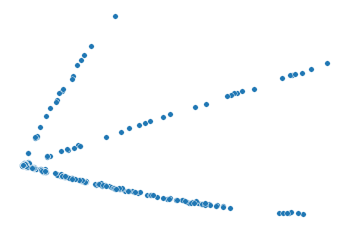

In [44]:
# PCA analysis on original data--not used for clustering
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
pca = PCA(n_components=2)
normVec = preprocessing.normalize(T2DM_otherDR)
pca_result = pca.fit_transform(normVec)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('principal component_0')
ax.set_ylabel('principal component_1')
ax.axis('off')
# ax.set_title('UMAP analysis on whole data')
sns.scatterplot(pca_result[:,0], pca_result[:,1],s=30)

# Trying out DBSCAN using pca data and selected eps
from sklearn.cluster import DBSCAN
import numpy as np
#eps=1 for tsne
# norm_pcaVec = preprocessing.normalize(pca_result)
clustering = DBSCAN(eps=0.08, min_samples=3).fit(pca_result)
labels=clustering.labels_
print('DBSCAN: {}'.format(silhouette_score(pca_result, labels, 
                                           metric='euclidean')))
plt.savefig(path+'PCA0.jpeg', dpi=500)
plt.savefig(path+'PCA0.tiff', dpi=500)
plt.savefig(path+'PCA0.png', dpi=500)

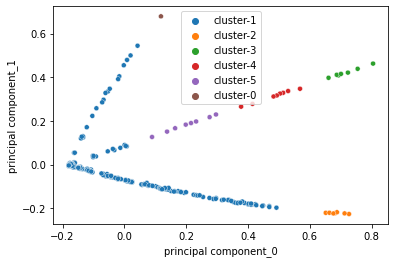

In [45]:
a1=sns.scatterplot(pca_result[:,0], pca_result[:,1],s=25, hue=["cluster-{}".format(x) for x in labels+1])
a1.set_xlabel('principal component_0')
a1.set_ylabel('principal component_1')
# a1.axis('off')
plt.savefig(path+'PCA1.jpeg', dpi=500)
plt.savefig(path+'PCA1.tiff', dpi=500)
plt.savefig(path+'PCA1.png', dpi=500)

DBSCAN: 0.2840687036514282


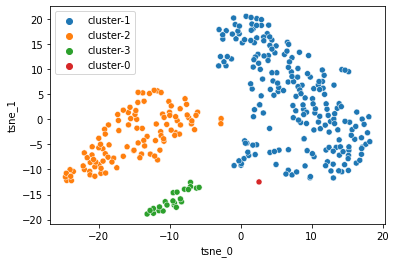

In [46]:
# t-sne
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
# norm_tsneVec=StandardScaler().fit_transform(T2DM_data)
tsne_data = model.fit_transform(T2DM_otherDR)
clustering = DBSCAN(eps=4, min_samples=3).fit(tsne_data)
labels=clustering.labels_
a2=sns.scatterplot(tsne_data[:,0], tsne_data[:,1], hue=["cluster-{}".format(x) for x in labels+1])
a2.set_xlabel('tsne_0')
a2.set_ylabel('tsne_1')
# a2.axis('off')
print('DBSCAN: {}'.format(silhouette_score(tsne_data, labels, 
                                           metric='euclidean')))
plt.savefig(path+'tsne1.jpeg', dpi=1000)
plt.savefig(path+'tsne1.png', dpi=1000)
plt.savefig(path+'tsne1.tiff', dpi=1000)

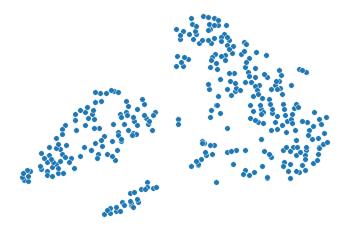

In [47]:
a2=sns.scatterplot(tsne_data[:,0], tsne_data[:,1],s=30)
a2.set_xlabel('tsne_0')
a2.set_ylabel('tsne_1')
a2.axis('off')
plt.savefig(path+'tsne0.jpeg', dpi=1000)
plt.savefig(path+'tsne0.png', dpi=1000)
plt.savefig(path+'tsne0.tiff', dpi=1000)

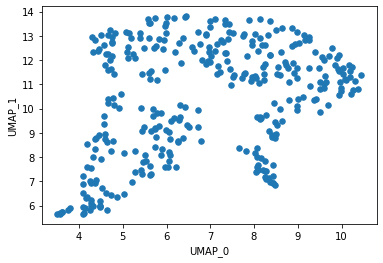

In [48]:
# UMAP analysis on whole data
umap_wholeData=umap.UMAP(n_neighbors=30,n_components=2,
                          min_dist=0.2,
                          metric='euclidean',
                         random_state=40).fit_transform(T2DM_otherDR)
# sns.scatterplot(data=umap_wholeData, x=umap_wholeData[:,0],y=umap_wholeData[:,1])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('UMAP_0')
ax.set_ylabel('UMAP_1')
# ax.set_title('UMAP analysis on whole data')
ax.scatter(umap_wholeData[:,0], umap_wholeData[:,1],s=30)
# ax.axis('off')
plt.savefig(path+'umap_wholeData.jpeg', dpi=500)
plt.savefig(path+'umap_wholeData.png', dpi=500)
plt.savefig(path+'umap_wholeData.tiff', dpi=500)

DBSCAN: 0.13818992674350739


(3.151875102519989, 10.800840532779693, 5.240767860412598, 14.216969108581543)

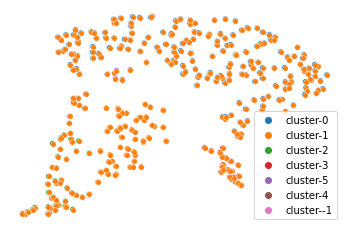

In [49]:
clustering = DBSCAN(eps=0.44, min_samples=4).fit(umap_wholeData)
labels=clustering.labels_
a2=sns.scatterplot(umap_wholeData[:,0], umap_wholeData[:,1], hue=["cluster-{}".format(x) for x in labels])
a2.set_xlabel('tsne_0')
a2.set_ylabel('tsne_1')
# a2.axis('off')
print('DBSCAN: {}'.format(silhouette_score(umap_wholeData, labels, 
                                           metric='euclidean')))
a2=sns.scatterplot(umap_wholeData[:,0], umap_wholeData[:,1],s=30)
a2.axis('off')

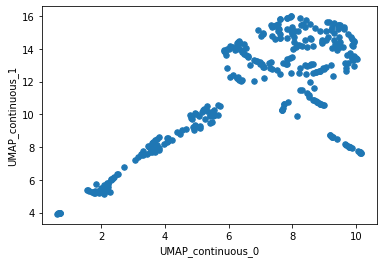

In [50]:
# Apply UMAP on continuos data
import umap.umap_ as umap
# np.random.seed(123)
T2DM_dataCont = preprocessing.normalize(T2DM_dataCont)
# print(T2DM_dataCont)
umap_contVar = umap.UMAP(n_neighbors=20,
                         n_components=2,
                      min_dist=0.05,
                      metric='minkowski',random_state=75).fit_transform(T2DM_dataCont)
# print(labels)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('UMAP_continuous_0')
ax.set_ylabel('UMAP_continuous_1')
# ax.set_title('UMAP analysis on continuous variables')
ax.scatter(umap_contVar[:,0], umap_contVar[:,1],s=30)
# ax.axis('off')
plt.savefig(path+'umap_contData.jpeg', dpi=500)
plt.savefig(path+'umap_contData.png', dpi=500)
plt.savefig(path+'umap_contData.tiff', dpi=500)
# sns.scatterplot(umap_contVar[:,0], umap_contVar[:,1])
# print(len(labels))
# print(umap_contVar)
umap_contVar=pd.DataFrame(umap_contVar)

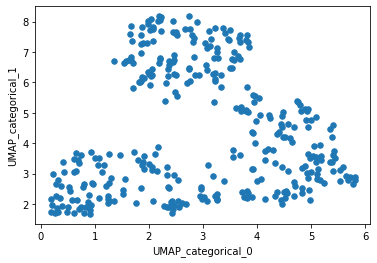

In [51]:
## Apply UMAP on ordinal data
# T2DM_dataOrdinal = preprocessing.normalize(T2DM_dataOrdinal)
umap_ordinalVar = umap.UMAP(n_neighbors=25,
                          n_components=2,
                      min_dist=0.1,
                      metric='canberra',random_state=110).fit_transform(T2DM_dataOrdinal)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('UMAP_categorical_0')
ax.set_ylabel('UMAP_categorical_1')
# ax.set_title('UMAP analysis on categorical variables')
ax.scatter(umap_ordinalVar[:,0], umap_ordinalVar[:,1],s=30)
# ax.axis('off')
plt.savefig(path+'umap_catData.jpeg', dpi=500)
plt.savefig(path+'umap_catData.png', dpi=500)
plt.savefig(path+'umap_catData.tiff', dpi=500)
# sns.scatterplot(umap_ordinalVar[:,0], umap_ordinalVar[:,1])
# np.shape(umap_categVar)
# /plt.show()
umap_ordinalVar=pd.DataFrame(umap_ordinalVar)

In [52]:
#combine umap
# intersection=umap_contVar*umap_nominalVar*umap_ordinalVar
# T2DM_umap=umap_contVar+umap_ordinalVar
#+umap_nominalVar
print(len(umap_contVar),len(umap_ordinalVar))
T2DM_umap=pd.concat([umap_contVar,umap_ordinalVar],axis=1)
print(np.shape(T2DM_umap))

336 336
(336, 4)


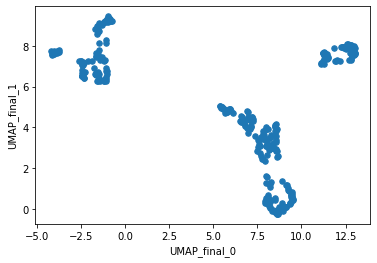

In [53]:
#combine umap after setting parameters
#np.random.seed(123)
T2DM_umapFinal=umap.UMAP(n_neighbors=30, min_dist=0.005,n_components=2,metric="euclidean",
                       random_state=150).fit_transform(T2DM_umap)
# T2DM_umap = preprocessing.normalize(T2DM_umap)

# T2DM_umapFinal=umap.UMAP(n_neighbors=30, min_dist=0.005,n_components=2,metric="euclidean",
#                        random_state=70).fit_transform(T2DM_umap)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('UMAP_final_0')
ax.set_ylabel('UMAP_final_1')
# ax.set_title('UMAP analysis on combined variables')
ax.scatter(T2DM_umapFinal[:,0], T2DM_umapFinal[:,1],s=30)
# ax.axis('off')
plt.savefig(path+'umap_combinedData.png', dpi=500)

In [54]:
# from sklearn.cluster import AgglomerativeClustering

# cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
# clustering=cluster.fit_predict(T2DM_umapFinal)
# labels=clustering
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.set_xlabel('umap_0')
# ax.set_ylabel('umap_1')
# # ax.set_title('DBSCAN on combined variables')
# # ax.scatter(T2DM_umapFinal[:,0], T2DM_umapFinal[:,1],s=18,c="green")

# sns.scatterplot(T2DM_umapFinal[:,0], T2DM_umapFinal[:,1], hue=["cluster-{}".format(x) for x in labels])
# print(len(labels))

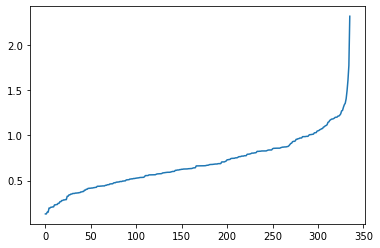

In [55]:
# To find elbow point to choose eps
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=30)
nbrs=neigh.fit(T2DM_umap)
distances, indices= nbrs.kneighbors(T2DM_umap)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

DBSCAN: 0.7419241070747375


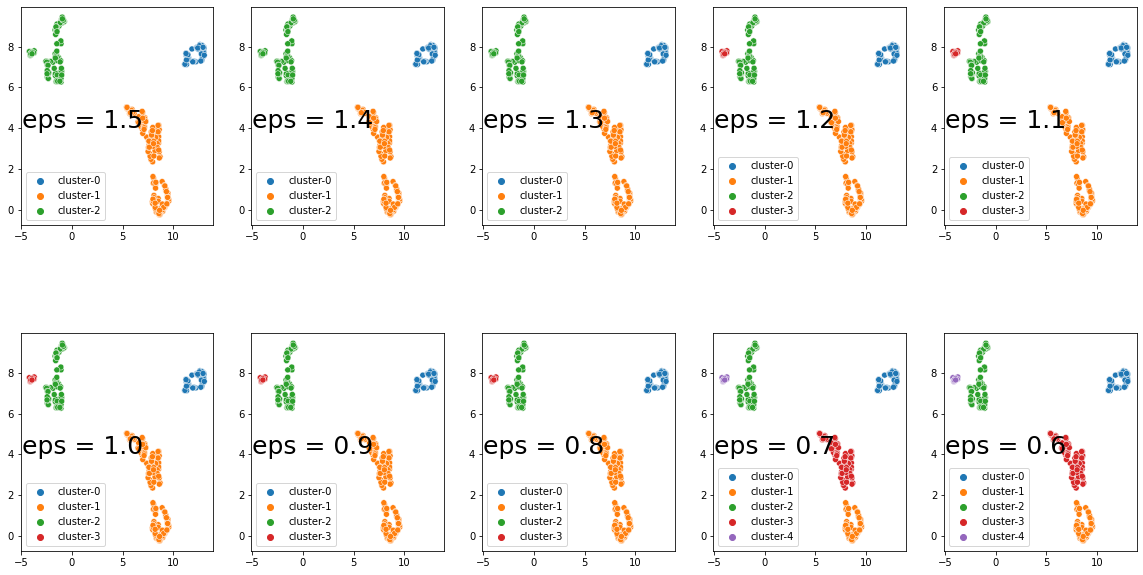

In [56]:
dbscan = DBSCAN(eps=1.3, min_samples=3).fit(T2DM_umapFinal)
# print(dbscan)
print('DBSCAN: {}'.format(silhouette_score(T2DM_umapFinal, dbscan.labels_, 
                                           metric='euclidean')))
# Try out dbscan with various values of eps and min_samples(using normalised tsne-data)
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in range(10, 0, -1):
    eps =0.5+(x/10)
    db = DBSCAN(eps=eps, min_samples=3).fit(T2DM_umapFinal)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    ax = fig.add_subplot(2, 5, i)
#     ax=fig.add_subplot(111,projection='3d')
    ax.text(1, 4, "eps = {}".format(round(eps, 1)), fontsize=25, ha="center")
    sns.scatterplot(T2DM_umapFinal[:,0], T2DM_umapFinal[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1

336
[0 1 2] [ 62 167 107]


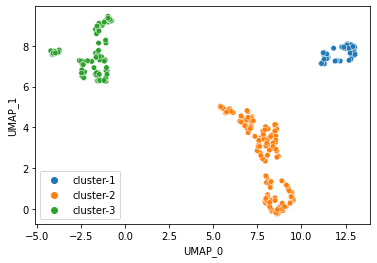

In [57]:
import matplotlib.pyplot as plt

# Trying out DBSCAN using UMAP embedding data
# T2DM_umapFinal=StandardScaler().fit_transform(T2DM_umapFinal)
clustering = DBSCAN(eps=1.3, min_samples=3).fit(T2DM_umapFinal)
labels=clustering.labels_
u_labels=np.unique(labels)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('UMAP_0')
ax.set_ylabel('UMAP_1')
# ax.axis('off')

sns.scatterplot(T2DM_umapFinal[:,0], T2DM_umapFinal[:,1], hue=["cluster-{}".format(x) for x in labels+1],s=30)
plt.savefig(path+'umap_DBSCAN.jpeg', dpi=500)
plt.savefig(path+'umap_DBSCAN.png', dpi=500)
plt.savefig(path+'umap_DBSCAN.tiff', dpi=500)

print(len(labels))
(values,counts) = np.unique(labels,return_counts=True)
print(values,counts)

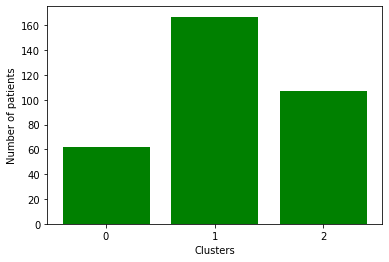

In [58]:
plt.bar(values,counts,tick_label=values,color='g')
plt.xlabel('Clusters')
plt.ylabel('Number of patients')
# plt.title('Distribution of clusters')
plt.savefig(path+'cluster_dist.png', dpi=1000)

In [59]:
# Add HbA1c and DispositionIndex and merge to T2DM_data
import math
data=pd.read_excel(path+"OGTT_Feb28.xlsx")

OGTT_data=data[['Patient_ID','HbA1c','DispositionIndex','FastingGlucose(mg/dl)',
                'PostPrandialGlucose(mg/dl)','FastingInsulin(uU/ml)',
                '30minInsulin(uU/ml)','HOMA-IR','HOMA-B']]
# print(math.sqrt(OGTT_data['FastingGlucose(mmol/l)'][1]))
# Calculate Matsuda Index
OGTT_data['MIndex']=0
print(len(OGTT_data.index))
for i in OGTT_data.index:
    if(OGTT_data['FastingGlucose(mg/dl)'][i] and OGTT_data['PostPrandialGlucose(mg/dl)'][i] and
       OGTT_data['FastingInsulin(uU/ml)'][i] and OGTT_data['30minInsulin(uU/ml)'][i]):
#         if(i==51):
#             print(OGTT_data['FastingGlucose(mmol/l)'][i],OGTT_data['PostPrandialGlucose(mmol/l)'][i],OGTT_data['FastingInsulin(pmol/l)'][i],OGTT_data['30minInsulin(pmol/l)'][i])
        deno=math.sqrt(OGTT_data['FastingGlucose(mg/dl)'][i]*OGTT_data['PostPrandialGlucose(mg/dl)'][i]*OGTT_data['FastingInsulin(uU/ml)'][i]*OGTT_data['30minInsulin(uU/ml)'][i])
        if (deno):
            OGTT_data['MIndex'][i]=10000/deno
    else:
        OGTT_data['MIndex'][i]=0
#     print(i)
print(OGTT_data['MIndex'])
# OGTT_data=OGTT_data.rename(columns={"Patient_ID":"Pt_ID"})
print(len(OGTT_data['Patient_ID']))
df_merge=pd.merge(T2DM_data,OGTT_data, on='Patient_ID', how='left')
# print(df_merge)
df_merge.to_csv(path+'df_merge.csv',index=True)
T2DM_data.to_csv(path+'df_T2DM.csv',index=True)
df_merge=df_merge.fillna(0)
# To find out of 339 pts, how many have undergone OGTT analysis 
# for i in df_merge.index:
#     df_merge=df_merge[df_merge['HbA1c'] != 0]

# df_merge[['DispositionIndex']]=df_merge[['DispositionIndex']].fillna(0)
# df_merge[['HbA1c']]=df_merge[['HbA1c']].fillna(0)
T2DM_data=df_merge
print(len(df_merge))
# T2DM_data['HOMA-IR']

150
0      4.0
1      4.0
2      6.0
3      8.0
4      NaN
      ... 
145    NaN
146    NaN
147    NaN
148    NaN
149    NaN
Name: MIndex, Length: 150, dtype: float64
150
336


In [60]:
# Assign cluster num to each row--> continuos and categorical
T2DM_data['cluster_label']=pd.Series(labels,index=T2DM_data.index)
print(len(T2DM_data))
C0=T2DM_data[T2DM_data['cluster_label']==0]
C1=T2DM_data[T2DM_data['cluster_label']==1]
C2=T2DM_data[T2DM_data['cluster_label']==2]
C3=T2DM_data[T2DM_data['cluster_label']==3]
C4=T2DM_data[T2DM_data['cluster_label']==4]
C5=T2DM_data[T2DM_data['cluster_label']==5]
C6=T2DM_data[T2DM_data['cluster_label']==6]

# Cluster sizes:
print("Cluster sizes",len(C0),len(C1),len(C2),len(C3),len(C4),len(C5),len(C6))
C0_size=len(C0)
C1_size=len(C1)
C2_size=len(C2)
C3_size=len(C3)
C4_size=len(C4)

# Split T2DM_data to categorical and continuous
#continuos features
T2DM_dataCont_firstV=T2DM_data[[
 'Age',
 'BMI_firstV',
   'SBP_(mm_Hg)firstV','DBP_(mm_Hg)firstV',
  'Known_DM',
 'Known_HT',
    'bodyfat_PerW_firstV',
#     'durationOfV',
  'cluster_label'
]]
# T2DM_dataCont_lastV=T2DM_data[[
#     'BMI_lastV',
#     'SBP_(mm_Hg)lastV','DBP_(mm_Hg)lastV',
#     'bodyfat_PerW_lastV',
#     'cluster_label'
# ]]
# C1['BMI']

# Categorical variables
T2DM_dataOrdinal=T2DM_data[[ 'Sex', 'Education', 'Shopkeepers', 'Farmers', 'Homemaker', 
#                             'student', 
                            'small scale business', 'Professionals', 
                         'Not working',
                            'Ischaemic Heart Disease (IHD)',
#                             'Dyslipidaemia',
                          'Hypertension',
                            'Dyslipidemia',
                            'Hypothyroid',
                           'ECG Findings',
                            'Metformin', 'Glimepiride',
                         'Teneligliptin',
                         'Pioglitazone','Insulin', 
                          'Hydrochlorothiazide','CCB',
                          'ACE Inhibitor','Beta blockers',
                            'ARB group',
                            'Drug_compliance',
#                             'Menopause', 'Menstrual regularity', 
                            'Alcoholic', 'Smoker','Bowel regularity', 'Sleep', 'Appetite','Ligation', 
#                           'Caesarean section',
                            'Appendicectomy',
                         'Cholecystectomy', 'Hysterectomy','Tonsillectomy',
#                          'TAH', 'Cataract surgery', 'Tympanoplasty', 'dacrocystectomy', 'Tumour', 
                              'Angioplasty', 
                            'Type 2 DM_P', 
                         'Hypertension_P', 'diabetic_cntl','HTN_cntl',
                            'cluster_label',
                            # To know % of data available with these parameters
                           'HbA1c','DispositionIndex','FastingInsulin(uU/ml)',
                           '30minInsulin(uU/ml)','HOMA-IR','HOMA-B',
                           'FastingGlucose(mg/dl)',
                            'PostPrandialGlucose(mg/dl)','MIndex',
                            'HTN_firstV'
                           ]]

# T2DM_dataOrdinal['HbA1c']

336
Cluster sizes 62 167 107 0 0 0 0


In [61]:
print(len(C0[C0['HOMA-B']!=0]))
print(len(C1[C1['HOMA-B']!=0]))
print(len(C2[C2['HOMA-B']!=0]))

17
49
34


In [62]:
# Continuous variables-- summary to file; Mean StdDev StdErr in a table
C0=T2DM_dataCont_firstV[T2DM_dataCont_firstV['cluster_label']==0]
C1=T2DM_dataCont_firstV[T2DM_dataCont_firstV['cluster_label']==1]
C2=T2DM_dataCont_firstV[T2DM_dataCont_firstV['cluster_label']==2]
# print(T2DM_dataCateg)

# print(keys)
test=C0.std()
fr=test.to_dict()
keys=fr.keys()
new_f=pd.DataFrame()
new_f['Variables']=['Age','BMI','SBP (mm_Hg)','DBP (mm_Hg)',
                    'Known T2DM(in months)','Known hypertension(in months)', 'Body fat percentage',
                    'cluster label']

C0_mean=round(C0.mean(),2)
C0_SE=round(C0.std()/np.sqrt(np.size(C0)),2)
new_f['Cluster 1']=0
for i in range(len(keys)):
    new_f['Cluster 1'][i]=str(C0_mean[i])+"\u00B1"+str(C0_SE[i])
    
C1_mean=round(C1.mean(),2)
C1_SE=round(C1.std()/np.sqrt(np.size(C1)),2)
new_f['Cluster 2']=0
for i in range(len(keys)):
    new_f['Cluster 2'][i]=str(C1_mean[i])+"\u00B1"+str(C1_SE[i])

C2_mean=round(C2.mean(),2)
C2_SE=round(C2.std()/np.sqrt(np.size(C2)),2)
new_f['Cluster 3']=0
for i in range(len(keys)):
    new_f['Cluster 3'][i]=str(C2_mean[i])+"\u00B1"+str(C2_SE[i])
    
print(new_f)
new_f.to_csv(path+'contVarFirstTable.csv',index=False)



                       Variables    Cluster 1    Cluster 2    Cluster 3
0                            Age   43.56±0.47   51.15±0.27   49.68±0.34
1                            BMI   24.58±0.14   25.04±0.12   24.26±0.12
2                    SBP (mm_Hg)  119.38±0.58  143.47±0.65  131.15±0.73
3                    DBP (mm_Hg)   78.72±0.42   83.57±0.32    81.4±0.33
4          Known T2DM(in months)    2.24±0.19   20.93±1.43   73.68±1.75
5  Known hypertension(in months)      0.0±0.0   27.85±1.53      0.0±0.0
6            Body fat percentage   18.48±0.22    20.2±0.18   18.87±0.19
7                  cluster label      0.0±0.0      1.0±0.0      2.0±0.0


In [63]:
# Not req.in final analysis
# Categorical variable summary to file
C0=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==0]
C1=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==1]
C2=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==2]
def count_values(cluster, col_name, value):
    return (cluster[col_name] == value).sum()

# find male and female in a feature separately
# List Female data:
listF=['Homemaker','Hypothyroid',
'Alcoholic',
'Smoker',
'Bowel regularity',
'Ligation',
'Appendicectomy',
'Type 2 DM_P',
'Hypertension_P'
]
H_count=0
H_per=0
for feature in listF:
    print("cluster----")
    for c in [C0,C1,C2]:
        for i in c.index:
            if(c[feature][i]==1):
    #             print(C0['Sex'][i])
                if(c['Sex'][i]=='1'):
                    H_count=H_count+1
        H_per=H_count/count_values(c,feature,1)*100
        print(feature,"--Female count and per--",H_count, H_per)
        H_count=0
        H_per=0
    
# print(H_count)

cluster----
Homemaker --Female count and per-- 60 100.0
Homemaker --Female count and per-- 73 98.64864864864865
Homemaker --Female count and per-- 61 100.0
cluster----
Hypothyroid --Female count and per-- 2 100.0
Hypothyroid --Female count and per-- 9 81.81818181818183
Hypothyroid --Female count and per-- 5 100.0
cluster----
Alcoholic --Female count and per-- 0 nan
Alcoholic --Female count and per-- 0 0.0
Alcoholic --Female count and per-- 0 0.0
cluster----
Smoker --Female count and per-- 0 nan
Smoker --Female count and per-- 0 0.0
Smoker --Female count and per-- 0 0.0
cluster----
Bowel regularity --Female count and per-- 19 100.0
Bowel regularity --Female count and per-- 28 60.86956521739131
Bowel regularity --Female count and per-- 22 70.96774193548387
cluster----
Ligation --Female count and per-- 5 100.0
Ligation --Female count and per-- 6 100.0
Ligation --Female count and per-- 10 100.0
cluster----
Appendicectomy --Female count and per-- 4 100.0
Appendicectomy --Female count and pe

In [64]:
# Descriptive statistics of var taken from final visit

# convert to months known DM, HTN

# Categorical variable summary to file
C0=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==0]
C1=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==1]
C2=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==2]
# C3=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==3]
# C4=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==4]


def count_values(cluster, col_name, value):
    return (cluster[col_name] == value).sum()

# intialise data of lists.
data = [['Cluster Size (N)','',C0_size,C1_size,C2_size,C3_size],
       ['Cat.Variables','Value for cat. variables:', 'count (%)','','',''],
        ['Sex','Female',
         str(count_values(C0,'Sex','1'))+"("+str(round(count_values(C0,'Sex','1')*100/C0_size,2))+")",
         str(count_values(C1,'Sex','1'))+"("+str(round(count_values(C1,'Sex','1')*100/C1_size,2))+")",
         str(count_values(C2,'Sex','1'))+"("+str(round(count_values(C2,'Sex','1')*100/C2_size,2))+")",
         str(count_values(C3,'Sex','1'))+"("+str(round(count_values(C3,'Sex','1')*100/C3_size,2))+")"]
        ,
         ['','Male',
         str(count_values(C0,'Sex','0'))+"("+str(round(count_values(C0,'Sex','0')*100/C0_size,2))+")",
         str(count_values(C1,'Sex','0'))+"("+str(round(count_values(C1,'Sex','0')*100/C1_size,2))+")",
         str(count_values(C2,'Sex','0'))+"("+str(round(count_values(C2,'Sex','0')*100/C2_size,2))+")",
         str(count_values(C3,'Sex','0'))+"("+str(round(count_values(C3,'Sex','0')*100/C3_size,2))+")"]
        ,
        ['Education','Below class 10',
         str(count_values(C0,'Education',1))+"("+str(round(count_values(C0,'Education',1)*100/C0_size,2))+")",
         str(count_values(C1,'Education',1))+"("+str(round(count_values(C1,'Education',1)*100/C1_size,2))+")",
         str(count_values(C2,'Education',1))+"("+str(round(count_values(C2,'Education',1)*100/C2_size,2))+")",
         str(count_values(C3,'Education',1))+"("+str(round(count_values(C3,'Education',1)*100/C3_size,2))+")"]
        ,
        ['Homemaker','Yes',
         str(count_values(C0,'Homemaker',1))+"("+str(round(count_values(C0,'Homemaker',1)*100/C0_size,2))+")",
         str(count_values(C1,'Homemaker',1))+"("+str(round(count_values(C1,'Homemaker',1)*100/C1_size,2))+")",
         str(count_values(C2,'Homemaker',1))+"("+str(round(count_values(C2,'Homemaker',1)*100/C2_size,2))+")",
         str(count_values(C3,'Homemaker',1))+"("+str(round(count_values(C3,'Homemaker',1)*100/C3_size,2))+")"]
      
        ,
        ['Shopkeepers','Yes',
         str(count_values(C0,'Shopkeepers',1))+"("+str(round(count_values(C0,'Shopkeepers',1)*100/C0_size,2))+")",
         str(count_values(C1,'Shopkeepers',1))+"("+str(round(count_values(C1,'Shopkeepers',1)*100/C1_size,2))+")",
         str(count_values(C2,'Shopkeepers',1))+"("+str(round(count_values(C2,'Shopkeepers',1)*100/C2_size,2))+")",
         str(count_values(C3,'Shopkeepers',1))+"("+str(round(count_values(C3,'Shopkeepers',1)*100/C3_size,2))+")"]
        ,
        ['Farmers','Yes',
         str(count_values(C0,'Farmers',1))+"("+str(round(count_values(C0,'Farmers',1)*100/C0_size,2))+")",
         str(count_values(C1,'Farmers',1))+"("+str(round(count_values(C1,'Farmers',1)*100/C1_size,2))+")",
         str(count_values(C2,'Farmers',1))+"("+str(round(count_values(C2,'Farmers',1)*100/C2_size,2))+")",
         str(count_values(C3,'Farmers',1))+"("+str(round(count_values(C3,'Farmers',1)*100/C3_size,2))+")"]
        ,
        ['Ischaemic Heart Disease (IHD)','Yes',
         str(count_values(C0,'Ischaemic Heart Disease (IHD)',1))+"("+str(round(count_values(C0,'Ischaemic Heart Disease (IHD)',1)*100/C0_size,2))+")",
         str(count_values(C1,'Ischaemic Heart Disease (IHD)',1))+"("+str(round(count_values(C1,'Ischaemic Heart Disease (IHD)',1)*100/C1_size,2))+")",
         str(count_values(C2,'Ischaemic Heart Disease (IHD)',1))+"("+str(round(count_values(C2,'Ischaemic Heart Disease (IHD)',1)*100/C2_size,2))+")",
         str(count_values(C3,'Ischaemic Heart Disease (IHD)',1))+"("+str(round(count_values(C3,'Ischaemic Heart Disease (IHD)',1)*100/C3_size,2))+")"]
        ,
        ['Hypertension','Yes',
         str(count_values(C0,'Hypertension',1))+"("+str(round(count_values(C0,'Hypertension',1)*100/C0_size,2))+")",
         str(count_values(C1,'Hypertension',1))+"("+str(round(count_values(C1,'Hypertension',1)*100/C1_size,2))+")",
         str(count_values(C2,'Hypertension',1))+"("+str(round(count_values(C2,'Hypertension',1)*100/C2_size,2))+")",
         str(count_values(C3,'Hypertension',1))+"("+str(round(count_values(C3,'Hypertension',1)*100/C3_size,2))+")"]
        ,
        ['Dyslipidemia','Yes',
         str(count_values(C0,'Dyslipidemia',1))+"("+str(round(count_values(C0,'Dyslipidemia',1)*100/C0_size,2))+")",
         str(count_values(C1,'Dyslipidemia',1))+"("+str(round(count_values(C1,'Dyslipidemia',1)*100/C1_size,2))+")",
         str(count_values(C2,'Dyslipidemia',1))+"("+str(round(count_values(C2,'Dyslipidemia',1)*100/C2_size,2))+")",
         str(count_values(C3,'Dyslipidemia',1))+"("+str(round(count_values(C3,'Dyslipidemia',1)*100/C3_size,2))+")"]
        ,
        ['ECG Findings','Yes',
         str(count_values(C0,'ECG Findings',1))+"("+str(round(count_values(C0,'ECG Findings',1)*100/C0_size,2))+")",
         str(count_values(C1,'ECG Findings',1))+"("+str(round(count_values(C1,'ECG Findings',1)*100/C1_size,2))+")",
         str(count_values(C2,'ECG Findings',1))+"("+str(round(count_values(C2,'ECG Findings',1)*100/C2_size,2))+")",
         str(count_values(C3,'ECG Findings',1))+"("+str(round(count_values(C3,'ECG Findings',1)*100/C3_size,2))+")"]

        ,
        ['Hypothyroid','Yes',
         str(count_values(C0,'Hypothyroid',1))+"("+str(round(count_values(C0,'Hypothyroid',1)*100/C0_size,2))+")",
         str(count_values(C1,'Hypothyroid',1))+"("+str(round(count_values(C1,'Hypothyroid',1)*100/C1_size,2))+")",
         str(count_values(C2,'Hypothyroid',1))+"("+str(round(count_values(C2,'Hypothyroid',1)*100/C2_size,2))+")",
         str(count_values(C3,'Hypothyroid',1))+"("+str(round(count_values(C3,'Hypothyroid',1)*100/C3_size,2))+")"]
        ,
        
         ['Metformin dosage','500mg',
          str(count_values(C0,'Metformin',1))+"("+str(round(count_values(C0,'Metformin',1)*100/C0_size,2))+")",
          str(count_values(C1,'Metformin',1))+"("+str(round(count_values(C1,'Metformin',1)*100/C1_size,2))+")",
         str(count_values(C2,'Metformin',1))+"("+str(round(count_values(C2,'Metformin',1)*100/C2_size,2))+")",
         str(count_values(C3,'Metformin',1))+"("+str(round(count_values(C3,'Metformin',1)*100/C3_size,2))+")"]
       ,
        ['','1000mg',
          str(count_values(C0,'Metformin',3))+"("+str(round(count_values(C0,'Metformin',3)*100/C0_size,2))+")",
          str(count_values(C1,'Metformin',3))+"("+str(round(count_values(C1,'Metformin',3)*100/C1_size,2))+")",
         str(count_values(C2,'Metformin',3))+"("+str(round(count_values(C2,'Metformin',3)*100/C2_size,2))+")",
         str(count_values(C3,'Metformin',3))+"("+str(round(count_values(C3,'Metformin',3)*100/C3_size,2))+")"]
       ,
        ['','1500mg',
          str(count_values(C0,'Metformin',4))+"("+str(round(count_values(C0,'Metformin',4)*100/C0_size,2))+")",
          str(count_values(C1,'Metformin',4))+"("+str(round(count_values(C1,'Metformin',4)*100/C1_size,2))+")",
         str(count_values(C2,'Metformin',4))+"("+str(round(count_values(C2,'Metformin',4)*100/C2_size,2))+")",
         str(count_values(C3,'Metformin',4))+"("+str(round(count_values(C3,'Metformin',4)*100/C3_size,2))+")"]
       ,
        ['','2000mg',
          str(count_values(C0,'Metformin',5))+"("+str(round(count_values(C0,'Metformin',5)*100/C0_size,2))+")",
          str(count_values(C1,'Metformin',5))+"("+str(round(count_values(C1,'Metformin',5)*100/C1_size,2))+")",
         str(count_values(C2,'Metformin',5))+"("+str(round(count_values(C2,'Metformin',5)*100/C2_size,2))+")",
         str(count_values(C3,'Metformin',5))+"("+str(round(count_values(C3,'Metformin',5)*100/C3_size,2))+")"]
       ,
        ['Glimepiride dosage','Not taking',
         str(count_values(C0,'Glimepiride',0))+"("+str(round(count_values(C0,'Glimepiride',0)*100/C0_size,2))+")",
          str(count_values(C1,'Glimepiride',0))+"("+str(round(count_values(C1,'Glimepiride',0)*100/C1_size,2))+")",
         str(count_values(C2,'Glimepiride',0))+"("+str(round(count_values(C2,'Glimepiride',0)*100/C2_size,2))+")",
         str(count_values(C3,'Glimepiride',0))+"("+str(round(count_values(C3,'Glimepiride',0)*100/C3_size,2))+")"]
       ,
        ['','1mg',
         str(count_values(C0,'Glimepiride',1))+"("+str(round(count_values(C0,'Glimepiride',1)*100/C0_size,2))+")",
          str(count_values(C1,'Glimepiride',1))+"("+str(round(count_values(C1,'Glimepiride',1)*100/C1_size,2))+")",
         str(count_values(C2,'Glimepiride',1))+"("+str(round(count_values(C2,'Glimepiride',1)*100/C2_size,2))+")",
         str(count_values(C3,'Glimepiride',1))+"("+str(round(count_values(C3,'Glimepiride',1)*100/C3_size,2))+")"]
       ,
        ['','2mg',
         str(count_values(C0,'Glimepiride',2))+"("+str(round(count_values(C0,'Glimepiride',2)*100/C0_size,2))+")",
          str(count_values(C1,'Glimepiride',2))+"("+str(round(count_values(C1,'Glimepiride',2)*100/C1_size,2))+")",
         str(count_values(C2,'Glimepiride',2))+"("+str(round(count_values(C2,'Glimepiride',2)*100/C2_size,2))+")",
         str(count_values(C3,'Glimepiride',2))+"("+str(round(count_values(C3,'Glimepiride',2)*100/C3_size,2))+")"]
       ,
        ['','4mg',
         str(count_values(C0,'Glimepiride',3))+"("+str(round(count_values(C0,'Glimepiride',3)*100/C0_size,2))+")",
          str(count_values(C1,'Glimepiride',3))+"("+str(round(count_values(C1,'Glimepiride',3)*100/C1_size,2))+")",
         str(count_values(C2,'Glimepiride',3))+"("+str(round(count_values(C2,'Glimepiride',3)*100/C2_size,2))+")",
         str(count_values(C3,'Glimepiride',3))+"("+str(round(count_values(C3,'Glimepiride',3)*100/C3_size,2))+")"]
       ,
        ['Teneligliptin dosage','Not taking',
         str(count_values(C0,'Teneligliptin',0))+"("+str(round(count_values(C0,'Teneligliptin',0)*100/C0_size,2))+")",
          str(count_values(C1,'Teneligliptin',0))+"("+str(round(count_values(C1,'Teneligliptin',0)*100/C1_size,2))+")",
         str(count_values(C2,'Teneligliptin',0))+"("+str(round(count_values(C2,'Teneligliptin',0)*100/C2_size,2))+")",
         str(count_values(C3,'Teneligliptin',0))+"("+str(round(count_values(C3,'Teneligliptin',0)*100/C3_size,2))+")"]
       ,
        ['','20mg',
         str(count_values(C0,'Teneligliptin',1))+"("+str(round(count_values(C0,'Teneligliptin',1)*100/C0_size,2))+")",
          str(count_values(C1,'Teneligliptin',1))+"("+str(round(count_values(C1,'Teneligliptin',1)*100/C1_size,2))+")",
         str(count_values(C2,'Teneligliptin',1))+"("+str(round(count_values(C2,'Teneligliptin',1)*100/C2_size,2))+")",
         str(count_values(C3,'Teneligliptin',1))+"("+str(round(count_values(C3,'Teneligliptin',1)*100/C3_size,2))+")"]
       ,
        ['','40mg',
         str(count_values(C0,'Teneligliptin',2))+"("+str(round(count_values(C0,'Teneligliptin',2)*100/C0_size,2))+")",
          str(count_values(C1,'Teneligliptin',2))+"("+str(round(count_values(C1,'Teneligliptin',2)*100/C1_size,2))+")",
         str(count_values(C2,'Teneligliptin',2))+"("+str(round(count_values(C2,'Teneligliptin',2)*100/C2_size,2))+")",
         str(count_values(C3,'Teneligliptin',2))+"("+str(round(count_values(C3,'Teneligliptin',2)*100/C3_size,2))+")"]
       ,
        ['Pioglitazone dosage','Not taking',
         str(count_values(C0,'Pioglitazone',0))+"("+str(round(count_values(C0,'Pioglitazone',0)*100/C0_size,2))+")",
          str(count_values(C1,'Pioglitazone',0))+"("+str(round(count_values(C1,'Pioglitazone',0)*100/C1_size,2))+")",
         str(count_values(C2,'Pioglitazone',0))+"("+str(round(count_values(C2,'Pioglitazone',0)*100/C2_size,2))+")",
         str(count_values(C3,'Pioglitazone',0))+"("+str(round(count_values(C3,'Pioglitazone',0)*100/C3_size,2))+")"]
       ,
        ['','15mg',
         str(count_values(C0,'Pioglitazone',1))+"("+str(round(count_values(C0,'Pioglitazone',1)*100/C0_size,2))+")",
          str(count_values(C1,'Pioglitazone',1))+"("+str(round(count_values(C1,'Pioglitazone',1)*100/C1_size,2))+")",
         str(count_values(C2,'Pioglitazone',1))+"("+str(round(count_values(C2,'Pioglitazone',1)*100/C2_size,2))+")",
         str(count_values(C3,'Pioglitazone',1))+"("+str(round(count_values(C3,'Pioglitazone',1)*100/C3_size,2))+")"]
       ,
        ['','30mg',
         str(count_values(C0,'Pioglitazone',2))+"("+str(round(count_values(C0,'Pioglitazone',2)*100/C0_size,2))+")",
          str(count_values(C1,'Pioglitazone',2))+"("+str(round(count_values(C1,'Pioglitazone',2)*100/C1_size,2))+")",
         str(count_values(C2,'Pioglitazone',2))+"("+str(round(count_values(C2,'Pioglitazone',2)*100/C2_size,2))+")",
         str(count_values(C3,'Pioglitazone',2))+"("+str(round(count_values(C3,'Pioglitazone',2)*100/C3_size,2))+")"]
        ,
         ['Insulin','Yes',
         str(count_values(C0,'Insulin',1))+"("+str(round(count_values(C0,'Insulin',1)*100/C0_size,2))+")",
         str(count_values(C1,'Insulin',1))+"("+str(round(count_values(C1,'Insulin',1)*100/C1_size,2))+")",
         str(count_values(C2,'Insulin',1))+"("+str(round(count_values(C2,'Insulin',1)*100/C2_size,2))+")",
         str(count_values(C3,'Insulin',1))+"("+str(round(count_values(C3,'Insulin',1)*100/C3_size,2))+")"]
        ,
         ['Hydrochlorothiazide','Yes',
         str(count_values(C0,'Hydrochlorothiazide',1))+"("+str(round(count_values(C0,'Hydrochlorothiazide',1)*100/C0_size,2))+")",
         str(count_values(C1,'Hydrochlorothiazide',1))+"("+str(round(count_values(C1,'Hydrochlorothiazide',1)*100/C1_size,2))+")",
         str(count_values(C2,'Hydrochlorothiazide',1))+"("+str(round(count_values(C2,'Hydrochlorothiazide',1)*100/C2_size,2))+")",
         str(count_values(C3,'Hydrochlorothiazide',1))+"("+str(round(count_values(C3,'Hydrochlorothiazide',1)*100/C3_size,2))+")"]
        ,
         ['CCB','Yes',
         str(count_values(C0,'CCB',1))+"("+str(round(count_values(C0,'CCB',1)*100/C0_size,2))+")",
         str(count_values(C1,'CCB',1))+"("+str(round(count_values(C1,'CCB',1)*100/C1_size,2))+")",
         str(count_values(C2,'CCB',1))+"("+str(round(count_values(C2,'CCB',1)*100/C2_size,2))+")",
         str(count_values(C3,'CCB',1))+"("+str(round(count_values(C3,'CCB',1)*100/C3_size,2))+")"]
        , ['ACE Inhibitor','Yes',
         str(count_values(C0,'ACE Inhibitor',1))+"("+str(round(count_values(C0,'ACE Inhibitor',1)*100/C0_size,2))+")",
         str(count_values(C1,'ACE Inhibitor',1))+"("+str(round(count_values(C1,'ACE Inhibitor',1)*100/C1_size,2))+")",
         str(count_values(C2,'ACE Inhibitor',1))+"("+str(round(count_values(C2,'ACE Inhibitor',1)*100/C2_size,2))+")",
         str(count_values(C3,'ACE Inhibitor',1))+"("+str(round(count_values(C3,'ACE Inhibitor',1)*100/C3_size,2))+")"]
        , ['Beta blockers','Yes',
         str(count_values(C0,'Beta blockers',1))+"("+str(round(count_values(C0,'Beta blockers',1)*100/C0_size,2))+")",
         str(count_values(C1,'Beta blockers',1))+"("+str(round(count_values(C1,'Beta blockers',1)*100/C1_size,2))+")",
         str(count_values(C2,'Beta blockers',1))+"("+str(round(count_values(C2,'Beta blockers',1)*100/C2_size,2))+")",
         str(count_values(C3,'Beta blockers',1))+"("+str(round(count_values(C3,'Beta blockers',1)*100/C3_size,2))+")"]
        , ['ARB group','Yes',
         str(count_values(C0,'ARB group',1))+"("+str(round(count_values(C0,'ARB group',1)*100/C0_size,2))+")",
         str(count_values(C1,'ARB group',1))+"("+str(round(count_values(C1,'ARB group',1)*100/C1_size,2))+")",
         str(count_values(C2,'ARB group',1))+"("+str(round(count_values(C2,'ARB group',1)*100/C2_size,2))+")",
         str(count_values(C3,'ARB group',1))+"("+str(round(count_values(C3,'ARB group',1)*100/C3_size,2))+")"]
        ,  ['Alcoholic','Yes',
         str(count_values(C0,'Alcoholic',1))+"("+str(round(count_values(C0,'Alcoholic',1)*100/(count_values(C0,'Sex','0')),2))+")",
         str(count_values(C1,'Alcoholic',1))+"("+str(round(count_values(C1,'Alcoholic',1)*100/(count_values(C1,'Sex','0')),2))+")",
         str(count_values(C2,'Alcoholic',1))+"("+str(round(count_values(C2,'Alcoholic',1)*100/(count_values(C2,'Sex','0')),2))+")",
         str(count_values(C3,'Alcoholic',1))+"("+str(round(count_values(C3,'Alcoholic',1)*100/(count_values(C3,'Sex','0')),2))+")"]
        , ['Smoker','Yes',
         str(count_values(C0,'Smoker',1))+"("+str(round(count_values(C0,'Smoker',1)*100/(count_values(C0,'Sex','0')),2))+")",
         str(count_values(C1,'Smoker',1))+"("+str(round(count_values(C1,'Smoker',1)*100/(count_values(C1,'Sex','0')),2))+")",
         str(count_values(C2,'Smoker',1))+"("+str(round(count_values(C2,'Smoker',1)*100/(count_values(C2,'Sex','0')),2))+")",
         str(count_values(C3,'Smoker',1))+"("+str(round(count_values(C3,'Smoker',1)*100/(count_values(C3,'Sex','0')),2))+")"]
        , ['Bowel regularity','Yes',
         str(count_values(C0,'Bowel regularity',1))+"("+str(round(count_values(C0,'Bowel regularity',1)*100/C0_size,2))+")",
         str(count_values(C1,'Bowel regularity',1))+"("+str(round(count_values(C1,'Bowel regularity',1)*100/C1_size,2))+")",
         str(count_values(C2,'Bowel regularity',1))+"("+str(round(count_values(C2,'Bowel regularity',1)*100/C2_size,2))+")",
         str(count_values(C3,'Bowel regularity',1))+"("+str(round(count_values(C3,'Bowel regularity',1)*100/C3_size,2))+")"]
        , ['Ligation','Yes',
         str(count_values(C0,'Ligation',1))+"("+str(round(count_values(C0,'Ligation',1)*100/(count_values(C0,'Sex','1')),2))+")",
         str(count_values(C1,'Ligation',1))+"("+str(round(count_values(C1,'Ligation',1)*100/(count_values(C1,'Sex','1')),2))+")",
         str(count_values(C2,'Ligation',1))+"("+str(round(count_values(C2,'Ligation',1)*100/(count_values(C2,'Sex','1')),2))+")",
         str(count_values(C3,'Ligation',1))+"("+str(round(count_values(C3,'Ligation',1)*100/(count_values(C3,'Sex','1')),2))+")"]
        , ['Appendectomy','Yes',
         str(count_values(C0,'Appendicectomy',1))+"("+str(round(count_values(C0,'Appendicectomy',1)*100/C0_size,2))+")",
         str(count_values(C1,'Appendicectomy',1))+"("+str(round(count_values(C1,'Appendicectomy',1)*100/C1_size,2))+")",
         str(count_values(C2,'Appendicectomy',1))+"("+str(round(count_values(C2,'Appendicectomy',1)*100/C2_size,2))+")",
         str(count_values(C3,'Appendicectomy',1))+"("+str(round(count_values(C3,'Appendicectomy',1)*100/C3_size,2))+")"]
        , ['Type 2 diabetic parent','Yes',
         str(count_values(C0,'Type 2 DM_P',1))+"("+str(round(count_values(C0,'Type 2 DM_P',1)*100/C0_size,2))+")",
         str(count_values(C1,'Type 2 DM_P',1))+"("+str(round(count_values(C1,'Type 2 DM_P',1)*100/C1_size,2))+")",
         str(count_values(C2,'Type 2 DM_P',1))+"("+str(round(count_values(C2,'Type 2 DM_P',1)*100/C2_size,2))+")",
         str(count_values(C3,'Type 2 DM_P',1))+"("+str(round(count_values(C3,'Type 2 DM_P',1)*100/C3_size,2))+")"]
        , ['Hypertensive parent','Yes',
         str(count_values(C0,'Hypertension_P',1))+"("+str(round(count_values(C0,'Hypertension_P',1)*100/C0_size,2))+")",
         str(count_values(C1,'Hypertension_P',1))+"("+str(round(count_values(C1,'Hypertension_P',1)*100/C1_size,2))+")",
         str(count_values(C2,'Hypertension_P',1))+"("+str(round(count_values(C2,'Hypertension_P',1)*100/C2_size,2))+")",
         str(count_values(C3,'Hypertension_P',1))+"("+str(round(count_values(C3,'Hypertension_P',1)*100/C3_size,2))+")"]
       ,
        ['HTN First V','Yes',
         str(count_values(C0,'HTN_firstV',1))+"("+str(round(count_values(C0,'HTN_firstV',1)*100/C0_size,2))+")",
         str(count_values(C1,'HTN_firstV',1))+"("+str(round(count_values(C1,'HTN_firstV',1)*100/C1_size,2))+")",
         str(count_values(C2,'HTN_firstV',1))+"("+str(round(count_values(C2,'HTN_firstV',1)*100/C2_size,2))+")",
         str(count_values(C3,'HTN_firstV',1))+"("+str(round(count_values(C3,'HTN_firstV',1)*100/C3_size,2))+")"]
       ]
#Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Identified clusters','' ,'Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

df.to_csv(path+'catVarTable.csv',index=False)
df

,Identified clusters,,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,Cluster Size (N),,62,167,107,0
1,Cat.Variables,Value for cat. variables:,count (%),,,
2,Sex,Female,62(100.0),93(55.69),73(68.22),0(nan)
3,,Male,0(0.0),74(44.31),34(31.78),0(nan)
4,Education,Below class 10,9(14.52),43(25.75),24(22.43),0(nan)
5,Homemaker,Yes,60(96.77),74(44.31),61(57.01),0(nan)
6,Shopkeepers,Yes,0(0.0),8(4.79),1(0.93),0(nan)
7,Farmers,Yes,4(6.45),19(11.38),12(11.21),0(nan)
8,Ischaemic Heart Disease (IHD),Yes,0(0.0),9(5.39),3(2.8),0(nan)
9,Hypertension,Yes,1(1.61),121(72.46),44(41.12),0(nan)


In [65]:
F_list=['HbA1c',
       'FastingGlucose(mg/dl)',
       'PostPrandialGlucose(mg/dl)',
       'FastingInsulin(uU/ml)',
      '30minInsulin(uU/ml)',
       'HOMA-B',
        'DispositionIndex',
        'HOMA-IR',
        'MIndex',
        'cluster_label'
       ]
tab2=T2DM_dataOrdinal[F_list]
tab2.to_csv(path+'Table2_data.csv',index=False)


In [66]:
# Post clustering data check using variables --insulin, adipsin etc.
import scipy.stats as stats
from scipy.stats.mstats import gmean
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

C0=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==0]
C1=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==1]
C2=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==2]

T2DM_dataOrdinal.to_csv(path+'T2DM_dataOrdinal.csv',index=False)
print(len(T2DM_dataOrdinal))

def count_values(cluster, col_name, value):
    return (cluster[col_name] == value).sum()

F_list=['HbA1c',
       'FastingGlucose(mg/dl)',
       'PostPrandialGlucose(mg/dl)',
       'FastingInsulin(uU/ml)',
      '30minInsulin(uU/ml)',
       'HOMA-B',
        'DispositionIndex',
        'HOMA-IR',
        'MIndex'
       ]

for c in [C0,C1,C2]:
    print("Cluster-----")
    for feature in F_list:
        temp=c[feature][c[feature]!=0]
        C_SE=str(round(gmean(temp),2))+"\u00B1"+str(round(temp.std()/np.sqrt(np.size(temp)),2))
        print(feature,C_SE)

# for feature in F_list:
#     fvalue, pvalue = stats.f_oneway(np.log(C0[feature][C0[feature]!=0]),np.log(C1[feature][C1[feature]!=0]),np.log(C2[feature][C2[feature]!=0]))
#     print(feature,":p-value ", round(pvalue,3))
#     tukey = pairwise_tukeyhsd(endog=df['data'],
#                           groups=df['group'],
#                           alpha=0.05)

# print(C2['DispositionIndex'][C2['DispositionIndex']!=0])
# print(round(gmean(C1['HOMA-B'][C1['HOMA-B']!=0]),2))
print("------------------------",C0['HbA1c'][C0['HbA1c']!=0])
# intialise data of lists.
data = [['Cluster Size (N)',C0_size,C1_size,C2_size],
       ['Variables','','',''],
        ['HbA1c',
         round(C0['HbA1c'][C0['HbA1c']!=0].mean(),2),
         round(C1['HbA1c'][C1['HbA1c']!=0].mean(),2),
         round(C2['HbA1c'][C2['HbA1c']!=0].mean(),2)]
#          round(C3['HbA1c'][C3['HbA1c']!=0].mean(),2)]
       ,
        ['Fasting Glucose(mg/dl)',
         round(C0['FastingGlucose(mg/dl)'][C0['FastingGlucose(mg/dl)']!=0].mean(),2),
         round(C1['FastingGlucose(mg/dl)'][C1['FastingGlucose(mg/dl)']!=0].mean(),2),
         round(C2['FastingGlucose(mg/dl)'][C2['FastingGlucose(mg/dl)']!=0].mean(),2)]
#          round(C3['FastingGlucose(mg/dl)'][C3['FastingGlucose(mg/dl)']!=0].mean(),2)]
       ,
       ['Post Prandial Glucose(mg/dl)',
         round(C0['PostPrandialGlucose(mg/dl)'][C0['PostPrandialGlucose(mg/dl)']!=0].mean(),2),
         round(C1['PostPrandialGlucose(mg/dl)'][C1['PostPrandialGlucose(mg/dl)']!=0].mean(),2),
         round(C2['PostPrandialGlucose(mg/dl)'][C2['PostPrandialGlucose(mg/dl)']!=0].mean(),2)]
#          round(C3['PostPrandialGlucose(mg/dl)'][C3['PostPrandialGlucose(mg/dl)']!=0].mean(),2)]
       ,
        ['Fasting Insulin(uU/ml)',         
         round(C0['FastingInsulin(uU/ml)'][C0['FastingInsulin(uU/ml)']!=0].mean(),2),
         round(C1['FastingInsulin(uU/ml)'][C1['FastingInsulin(uU/ml)']!=0].mean(),2),
         round(C2['FastingInsulin(uU/ml)'][C2['FastingInsulin(uU/ml)']!=0].mean(),2)
        ]
       ,
        ['30min Insulin(uU/ml)',         
         round(C0['30minInsulin(uU/ml)'][C0['30minInsulin(uU/ml)']!=0].mean(),2),
         round(C1['30minInsulin(uU/ml)'][C1['30minInsulin(uU/ml)']!=0].mean(),2),
         round(C2['30minInsulin(uU/ml)'][C2['30minInsulin(uU/ml)']!=0].mean(),2)
#          round(C3['30minInsulin(uU/ml)'][C3['30minInsulin(uU/ml)']!=0].mean(),2)
        ]
       ,
        ['HOMA-B',
         round(gmean(C0['HOMA-B'][C0['HOMA-B']!=0]),2),
         round(gmean(C1['HOMA-B'][C1['HOMA-B']!=0]),2),
         round(gmean(C2['HOMA-B'][C2['HOMA-B']!=0]),2)
#          round(C3['HOMA-B'][C3['HOMA-B']!=0].mean(),2)
        ]
        ,
         ['Disposition Index',
         round(gmean(C0['DispositionIndex'][C0['DispositionIndex']!=0]),2),
         round(gmean(C1['DispositionIndex'][C1['DispositionIndex']!=0]),2),
         round(gmean(C2['DispositionIndex'][C2['DispositionIndex']!=0]),2)
#          round(C3['DispositionIndex'][C3['DispositionIndex']!=0].mean(),2)
         ]
       ,
        ['HOMA-IR',
         round(gmean(C0['HOMA-IR'][C0['HOMA-IR']!=0]),2),
         round(gmean(C1['HOMA-IR'][C1['HOMA-IR']!=0]),2),
         round(gmean(C2['HOMA-IR'][C2['HOMA-IR']!=0]),2)
#          round(C3['HOMA-IR'][C3['HOMA-IR']!=0].mean(),2)
        ]
       ,
        ['Matsuda Index',
         round(gmean(C0['MIndex'][C0['MIndex']!=0]),2),
         round(gmean(C1['MIndex'][C1['MIndex']!=0]),2),
         round(gmean(C2['MIndex'][C2['MIndex']!=0]),2)
#          round(C3['MIndex'][C3['MIndex']!=0].mean(),2)
        ]
       ]

#Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Identified clusters' ,'Cluster 1','Cluster 2','Cluster 3'])

df.to_csv(path+'postCluTable.csv',index=False)
df.style.hide_index()
        


336
Cluster-----
HbA1c 7.63±0.31
FastingGlucose(mg/dl) 158.65±20.01
PostPrandialGlucose(mg/dl) 239.49±21.37
FastingInsulin(uU/ml) 3.69±0.69
30minInsulin(uU/ml) 15.63±4.67
HOMA-B 17.85±32.7
DispositionIndex 0.75±0.65
HOMA-IR 1.72±1.43
MIndex 6.75±1.96
Cluster-----
HbA1c 7.32±0.19
FastingGlucose(mg/dl) 127.4±5.69
PostPrandialGlucose(mg/dl) 217.66±7.27
FastingInsulin(uU/ml) 4.95±0.75
30minInsulin(uU/ml) 15.56±2.46
HOMA-B 26.54±7.32
DispositionIndex 0.36±0.22
HOMA-IR 1.71±1.15
MIndex 6.78±1.24
Cluster-----
HbA1c 8.24±0.28
FastingGlucose(mg/dl) 167.71±13.29
PostPrandialGlucose(mg/dl) 269.36±18.97
FastingInsulin(uU/ml) 3.78±0.89
30minInsulin(uU/ml) 13.45±1.94
HOMA-B 15.38±4.22
DispositionIndex 0.45±0.1
HOMA-IR 1.73±0.66
MIndex 6.58±1.61
------------------------ 2       7.600
21      8.440
27      6.800
73      9.350
98      6.750
102     5.913
108     7.100
113     6.476
141     7.618
179     8.956
205     5.600
208     7.300
220     5.771
272     8.300
287     7.919
289     8.300
300     9.

Identified clusters,Cluster 1,Cluster 2,Cluster 3
Cluster Size (N),62,167,107
Variables,,,
HbA1c,7.740000,7.460000,8.410000
Fasting Glucose(mg/dl),172.290000,133.140000,180.380000
Post Prandial Glucose(mg/dl),251.270000,223.050000,287.120000
Fasting Insulin(uU/ml),4.710000,6.680000,6.050000
30min Insulin(uU/ml),20.350000,20.790000,17.280000
HOMA-B,17.850000,26.540000,15.380000
Disposition Index,0.750000,0.360000,0.450000
HOMA-IR,1.720000,1.710000,1.730000


In [67]:

        
df_rem_Out=T2DM_dataOrdinal[T2DM_dataOrdinal['HOMA-B']!=0]
df_rem_Out=T2DM_dataOrdinal[T2DM_dataOrdinal['HOMA-B']<200]
df_rem_Out=T2DM_dataOrdinal[T2DM_dataOrdinal['DispositionIndex']>0]
df_rem_Out=T2DM_dataOrdinal[T2DM_dataOrdinal['DispositionIndex']<10]
df_rem_Out=T2DM_dataOrdinal[T2DM_dataOrdinal['MIndex']<45]
df_rem_Out=T2DM_dataOrdinal[T2DM_dataOrdinal['HOMA-IR']<50]
print(df_rem_Out['HOMA-B'])
df_rem_Out.to_csv(path+'df_rem_Out.csv',index=False)
# plt.boxplot(C0['HOMA-B'],C1['HOMA-B'],C2['HOMA-B'])

0       0.000000
1      26.574367
2      34.293042
3       0.000000
4       2.222141
         ...    
331     0.000000
332     0.000000
333     0.000000
334    88.926400
335     0.000000
Name: HOMA-B, Length: 335, dtype: float64


C0 and C1
HOMA-B
Ttest_indResult(statistic=0.36682955500246506, pvalue=0.7149562354347246)
DispositionIndex
Ttest_indResult(statistic=1.382126391427268, pvalue=0.17173786032614966)
HOMA-IR
Ttest_indResult(statistic=0.028443736308619266, pvalue=0.9773967525644225)
MIndex
Ttest_indResult(statistic=-0.19738383715853594, pvalue=0.8441527259233186)
----------
Ttest_indResult(statistic=-1.8035491356456443, pvalue=0.07502018064566879)
Ttest_indResult(statistic=1.0749984754861408, pvalue=0.2876404347379161)


0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
1    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

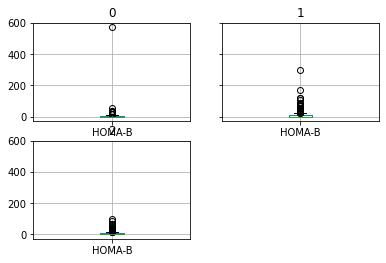

In [68]:
# This is for performing t-test between two clusters and visualisation using box plot
C0['HOMA-B'][C0['HOMA-B']!=0]
C1['HOMA-B'][C1['HOMA-B']!=0]
print("C0 and C1")
print("HOMA-B")
print(stats.ttest_ind(C0['HOMA-B'][C0['HOMA-B']!=0], C1['HOMA-B'][C1['HOMA-B']!=0]))
print("DispositionIndex")
print(stats.ttest_ind(C0['DispositionIndex'][C0['DispositionIndex']!=0], C1['DispositionIndex'][C1['DispositionIndex']!=0]))
print("HOMA-IR")
print(stats.ttest_ind(C0['HOMA-IR'][C0['HOMA-IR']!=0], C1['HOMA-IR'][C1['HOMA-IR']!=0]))
print("MIndex")
print(stats.ttest_ind(C0['MIndex'][C0['MIndex']!=0], C1['MIndex'][C1['MIndex']!=0]))
print("----------")

print(stats.ttest_ind(C2['HOMA-B'][C2['HOMA-B']!=0], C1['HOMA-B'][C1['HOMA-B']!=0]))

print(stats.ttest_ind(C0['HOMA-B'][C0['HOMA-B']!=0], C2['HOMA-B'][C2['HOMA-B']!=0]))



df_rem_Out=df_rem_Out.loc[(df_rem_Out['cluster_label']==0) | (df_rem_Out['cluster_label']==1) | (df_rem_Out['cluster_label']==2)]
groupby_C01 = df_rem_Out.groupby('cluster_label')
groupby_C01.boxplot(column=['HOMA-B'])
# plt.figure(figsize=(15,16)) 
# creating the bar plot

In [69]:
#Gmean for last 4 features
for c in [C0,C1,C2]:
    print("Cluster-----")
    for feature in F_list:
        print(feature)
        temp=c[feature][c[feature]!=0]
        std=np.exp(np.std(np.log((temp))))
        C_SE=std/np.sqrt(np.size(temp))
        print(gmean(temp),C_SE)


Cluster-----
HbA1c
7.63032448931905 0.27254444062858013
FastingGlucose(mg/dl)
158.65348055053101 0.35605245072484176
PostPrandialGlucose(mg/dl)
239.48917440277074 0.3267592436036909
FastingInsulin(uU/ml)
3.6947720021779737 0.5425182361864612
30minInsulin(uU/ml)
15.63267922885121 0.47988437545082874
HOMA-B
17.852665145014093 0.8222938657934639
DispositionIndex
0.7490658664762812 0.7235538628840522
HOMA-IR
1.7161785220877412 0.7751917696165709
MIndex
6.750279014403851 0.46805045214295604
Cluster-----
HbA1c
7.320378133580231 0.16250685350649066
FastingGlucose(mg/dl)
127.40120336518926 0.19065245256853838
PostPrandialGlucose(mg/dl)
217.6579041323197 0.17791374841214272
FastingInsulin(uU/ml)
4.9473782606342285 0.33262658107059684
30minInsulin(uU/ml)
15.564324448037683 0.31309727342516525
HOMA-B
26.535901549966855 0.41420798285002386
DispositionIndex
0.3574695831298257 0.5690276557973523
HOMA-IR
1.710933200007675 0.3873961426746376
MIndex
6.784091746420645 0.2964771102723155
Cluster-----
HbA

In [70]:
# t-test for independent samples: Pair-wise
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
 
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
# 	print(mean1)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p

def t_test() :  
    # seed the random number generator
    seed(1)
    # calculate the t test
    alpha = 0.05
    t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
    print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
    # interpret via critical value
    if abs(t_stat) <= cv:
        print('Accept null hypothesis that the means are equal.')
    else:
        print('Reject the null hypothesis that the means are equal.')
    # interpret via p-value
    if p > alpha:
        print('Accept null hypothesis that the means are equal.')
    else:
        print('Reject the null hypothesis that the means are equal.')

# Statistics t-test cluster-wise
print("t-test for cluster 0 and cluster 1")
for feature in F_list:
    print(("\n"+feature))
    data1=C0[feature][C0[feature]!=0]
    data2=C1[feature][C1[feature]!=0]
    t_test()
print("t-test for cluster 0 and cluster 2")
for feature in F_list:
    print(("\n"+feature))
    data1=C0[feature][C0[feature]!=0]
    data2=C2[feature][C2[feature]!=0]
    t_test()
print("t-test for cluster 1 and cluster 2")
for feature in F_list:
    print(("\n"+feature))
    data1=C1[feature][C1[feature]!=0]
    data2=C2[feature][C2[feature]!=0]
    t_test()
    


t-test for cluster 0 and cluster 1

HbA1c
t=0.780, df=73, cv=1.666, p=0.438
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.

FastingGlucose(mg/dl)
t=1.882, df=65, cv=1.669, p=0.064
Reject the null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.

PostPrandialGlucose(mg/dl)
t=1.251, df=64, cv=1.669, p=0.216
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.

FastingInsulin(uU/ml)
t=-1.941, df=64, cv=1.669, p=0.057
Reject the null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.

30minInsulin(uU/ml)
t=-0.084, df=64, cv=1.669, p=0.934
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.

HOMA-B
t=0.249, df=64, cv=1.669, p=0.804
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.

DispositionIndex
t=1.079, df=64, cv=1.669, p=0.285
A

In [71]:
C0=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==0]
C1=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==1]
C2=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==2]

for feature in F_list:
    print(len(C0[feature][C0[feature]!=0]))
    print(len(C1[feature][C1[feature]!=0]))
    print(len(C2[feature][C2[feature]!=0]))

19
56
39
17
50
34
17
49
34
17
49
34
17
49
34
17
49
34
17
49
33
17
49
34
17
49
34


In [72]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
df=T2DM_dataOrdinal.copy()
df.rename(columns={'FastingGlucose(mg/dl)': 'FastingGlucose','PostPrandialGlucose(mg/dl)':'PostPrandialGlucose',
                  'FastingInsulin(uU/ml)':'FastingInsulin','30minInsulin(uU/ml)':'minInsulin','HOMA-B':'HOMAB',
                  'HOMA-IR':'HOMAIR'}, inplace=True)
# df=df[df['HOMAB']>0]
# df=df[df['HOMAB']<200]
# df=df[df['DispositionIndex']>0]
# df=df[df['DispositionIndex']<10]
# df=df[df['MIndex']<45]
# df=df[df['HOMAIR']<50]
# df = df.sample(n=50)

df.to_csv(path+'df.csv',index=False)

res = stat()
F_list=['HbA1c',
       'FastingGlucose',
       'PostPrandialGlucose',
       'FastingInsulin',
       'minInsulin',
       'HOMAB',
        'DispositionIndex',
        'HOMAIR',
        'MIndex'
       ]

for feature in F_list:
    print(feature)
    res.tukey_hsd(df=df, res_var=feature, xfac_var='cluster_label', anova_model=feature+" ~ C(cluster_label)")
    print(res.tukey_summary)
    
    
# stats.ttest_rel(df['bp_before'], df['bp_after'])


HbA1c
   group1  group2      Diff     Lower     Upper   q-value   p-value
0       0       1  0.128375 -1.211700  1.468450  0.318962  0.900000
1       0       2  0.692888 -0.745318  2.131093  1.604091  0.495031
2       1       2  0.564513 -0.551298  1.680323  1.684497  0.461119
FastingGlucose
   group1  group2       Diff      Lower      Upper   q-value   p-value
0       0       1   7.378172 -20.612453  35.368797  0.877654  0.789116
1       0       2  10.075829 -19.964491  40.116149  1.116769  0.692387
2       1       2  17.454001  -5.852340  40.760341  2.493492  0.183815
PostPrandialGlucose
   group1  group2       Diff      Lower      Upper   q-value   p-value
0       0       1   3.453472 -39.732068  46.639012  0.266259  0.900000
1       0       2  22.337050 -24.010876  68.684976  1.604658  0.494791
2       1       2  25.790522 -10.167835  61.748880  2.388072  0.211288
FastingInsulin
   group1  group2      Diff     Lower     Upper   q-value   p-value
0       0       1  0.669490 -0.68652

In [73]:
# Pairwise t-test
for feature in F_list:
    print(feature)
    res.tukey_hsd(df=df, res_var=feature, xfac_var='cluster_label', anova_model=feature+" ~ C(cluster_label)")
    print(res.tukey_summary)
    
    
# stats.ttest_rel(C0[feature]df['bp_before'], df['bp_after'])

HbA1c
   group1  group2      Diff     Lower     Upper   q-value   p-value
0       0       1  0.128375 -1.211700  1.468450  0.318962  0.900000
1       0       2  0.692888 -0.745318  2.131093  1.604091  0.495031
2       1       2  0.564513 -0.551298  1.680323  1.684497  0.461119
FastingGlucose
   group1  group2       Diff      Lower      Upper   q-value   p-value
0       0       1   7.378172 -20.612453  35.368797  0.877654  0.789116
1       0       2  10.075829 -19.964491  40.116149  1.116769  0.692387
2       1       2  17.454001  -5.852340  40.760341  2.493492  0.183815
PostPrandialGlucose
   group1  group2       Diff      Lower      Upper   q-value   p-value
0       0       1   3.453472 -39.732068  46.639012  0.266259  0.900000
1       0       2  22.337050 -24.010876  68.684976  1.604658  0.494791
2       1       2  25.790522 -10.167835  61.748880  2.388072  0.211288
FastingInsulin
   group1  group2      Diff     Lower     Upper   q-value   p-value
0       0       1  0.669490 -0.68652

In [74]:
# Testing normality
from sklearn import preprocessing
from scipy.stats import norm
from scipy.stats import shapiro
# C1[feature][C1[feature]!=0]
for c in [C0,C1,C2]:
    for feature in F_list:
        print(("\n"+feature))
        data=np.log(c[feature][c[feature]!=0])
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        print(gmean(data))
#     normalized_df=(df-df.mean())/df.std()
# #     normalized_df.hist()
# #     print(normalized_df)
#     stat, p = shapiro(normalized_df)
#     print('Statistics=%.3f, p=%.3f' % (stat, p))


HbA1c
Statistics=0.970, p=0.784
2.0247087114658435

FastingGlucose


KeyError: 'FastingGlucose'

In [ ]:
for feature in ['DispositionIndex','MIndex','HOMA-B','HOMA-IR']:
    fvalue, pvalue = stats.f_oneway(np.log(C0[feature][C0[feature]!=0]),np.log(C1[feature][C1[feature]!=0])
                                    ,np.log(C2[feature][C2[feature]!=0]))
    print(feature,":p-value ", round(pvalue,3))

In [ ]:
# Anti-diabetic drug therapy summary
C0=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==0]
C1=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==1]
C2=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==2]
from itertools import combinations

listDrugs=['Metformin','Glimepiride','Teneligliptin','Pioglitazone','Insulin']
listMono=[]
listMono.append('Cluster Size')
listMono.append(C0_size)
listMono.append(C1_size)
listMono.append(C2_size)
# Mono therapy
comb = combinations(listDrugs, 1)
for i in list(comb):
    listMono.append(i)
    cluster_list=[C0,C1,C2]
    for c in cluster_list:
        temp=len(c[c[i[0]]!=0])
        listMono.append(str(temp)+"("+str(round((temp/len(c))*100,2))+")")

#     listMono.append(len(C1[C1[i[0]]!=0]))
#     listMono.append(len(C2[C2[i[0]]!=0]))
comb = combinations(listDrugs, 2)

# Dual therapy
for i in list(comb):
    listMono.append(i)
    cluster_list=[C0,C1,C2]
    for c in cluster_list:
        temp=len(c.loc[(c[i[0]]!=0) & (c[i[1]]!=0)])
        listMono.append(str(temp)+"("+str(round(temp*100/len(c),2))+")")
# Triple therapy        
comb = combinations(listDrugs, 3)
for i in list(comb):
    listMono.append(i)
    for c in cluster_list:
        temp=len(c.loc[(c[i[0]]!=0) & (c[i[1]]!=0) & (c[i[2]]!=0)])
        listMono.append(str(temp)+"("+str(round(temp*100/len(c),2))+")")

        # Quad therapy        
comb = combinations(listDrugs, 4)
for i in list(comb):
    listMono.append(i)
    for c in cluster_list:
        temp=len(c.loc[(c[i[0]]!=0) & (c[i[1]]!=0) & (c[i[2]]!=0) & (c[i[3]]!=0)])
        listMono.append(str(temp)+"("+str(round(temp*100/len(c),2))+")")
        # pent therapy
comb = combinations(listDrugs, 5)
for i in list(comb):
    listMono.append(i)
    for c in cluster_list:
        temp=len(c.loc[(c[i[0]]!=0) & (c[i[1]]!=0) & (c[i[2]]!=0) & (c[i[3]]!=0) & (c[i[4]]!=0)])
        listMono.append(str(temp)+"("+str(round(temp*100/len(c),2))+")")
         
from prettytable import PrettyTable 
# print(listMono)   
myTable = PrettyTable(['Identified clusters' ,'Cluster 1','Cluster 2','Cluster 3']) 
Drug_array = np.array(listMono)
for i in range(0,len(Drug_array)-1,4):
    Drug_array[i]=str(Drug_array[i]).replace("(", "") 
    Drug_array[i]=str(Drug_array[i]).replace(")", "") 
    Drug_array[i]=str(Drug_array[i]).replace("'", "") 
    Drug_array[i]=str(Drug_array[i]).replace(",", "") 
    
    
#     print(Drug_array[i], Drug_array[i+1],Drug_array[i+2],Drug_array[i+3])
    myTable.add_row([str(Drug_array[i]), str(Drug_array[i+1]),str(Drug_array[i+2]),str(Drug_array[i+3])])
     
print(myTable)

# Find therapy
# Mono- 100%
# Dual
# Tri
# Quad



In [75]:
# Anti-HTN drug therapy summary
C0=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==0]
C1=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==1]
C2=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==2]
from itertools import combinations

listDrugs=['Hydrochlorothiazide',
                            'CCB',
                          'ACE Inhibitor',
                            'Beta blockers',
                            'ARB group']
listMono=[]
listMono.append('Cluster Size')
listMono.append(C0_size)
listMono.append(C1_size)
listMono.append(C2_size)
# Mono therapy
comb = combinations(listDrugs, 1)
for i in list(comb):
    listMono.append(i)
    cluster_list=[C0,C1,C2]
    for c in cluster_list:
        temp=len(c[c[i[0]]!=0])
        listMono.append(str(temp)+"("+str(round((temp/len(c))*100,2))+")")

#     listMono.append(len(C1[C1[i[0]]!=0]))
#     listMono.append(len(C2[C2[i[0]]!=0]))
comb = combinations(listDrugs, 2)

# Dual therapy
for i in list(comb):
    listMono.append(i)
    cluster_list=[C0,C1,C2]
    for c in cluster_list:
        temp=len(c.loc[(c[i[0]]!=0) & (c[i[1]]!=0)])
        listMono.append(str(temp)+"("+str(round(temp*100/len(c),2))+")")
# Triple therapy        
comb = combinations(listDrugs, 3)
for i in list(comb):
    listMono.append(i)
    for c in cluster_list:
        temp=len(c.loc[(c[i[0]]!=0) & (c[i[1]]!=0) & (c[i[2]]!=0)])
        listMono.append(str(temp)+"("+str(round(temp*100/len(c),2))+")")

        # Quad therapy        
comb = combinations(listDrugs, 4)
for i in list(comb):
    listMono.append(i)
    for c in cluster_list:
        temp=len(c.loc[(c[i[0]]!=0) & (c[i[1]]!=0) & (c[i[2]]!=0) & (c[i[3]]!=0)])
        listMono.append(str(temp)+"("+str(round(temp*100/len(c),2))+")")
        # pent therapy
comb = combinations(listDrugs, 5)
for i in list(comb):
    listMono.append(i)
    for c in cluster_list:
        temp=len(c.loc[(c[i[0]]!=0) & (c[i[1]]!=0) & (c[i[2]]!=0) & (c[i[3]]!=0) & (c[i[4]]!=0)])
        listMono.append(str(temp)+"("+str(round(temp*100/len(c),2))+")")
         
from prettytable import PrettyTable 
# print(listMono)   
myTable = PrettyTable(['Identified clusters' ,'Cluster 1','Cluster 2','Cluster 3']) 
Drug_array = np.array(listMono)
for i in range(0,len(Drug_array)-1,4):
    Drug_array[i]=str(Drug_array[i]).replace("(", "") 
    Drug_array[i]=str(Drug_array[i]).replace(")", "") 
    Drug_array[i]=str(Drug_array[i]).replace("'", "") 
    Drug_array[i]=str(Drug_array[i]).replace(",", "") 
    
    
#     print(Drug_array[i], Drug_array[i+1],Drug_array[i+2],Drug_array[i+3])
    myTable.add_row([str(Drug_array[i]), str(Drug_array[i+1]),str(Drug_array[i+2]),str(Drug_array[i+3])])
     
print(myTable)



+---------------------------------------------------------------+-----------+-----------+-----------+
|                      Identified clusters                      | Cluster 1 | Cluster 2 | Cluster 3 |
+---------------------------------------------------------------+-----------+-----------+-----------+
|                          Cluster Size                         |     62    |    167    |    107    |
|                      Hydrochlorothiazide                      |   0(0.0)  |   1(0.6)  |  1(0.93)  |
|                              CCB                              |  1(1.61)  | 53(31.74) |  23(21.5) |
|                         ACE Inhibitor                         |   0(0.0)  | 74(44.31) | 25(23.36) |
|                         Beta blockers                         |  4(6.45)  |  7(4.19)  |  4(3.74)  |
|                           ARB group                           |  1(1.61)  | 26(15.57) |  10(9.35) |
|                    Hydrochlorothiazide CCB                    |   0(0.0)  |   1(

In [76]:
def export_legend(legend, filename="legend"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(path+''+filename+'.png', dpi=500, bbox_inches=bbox)
    fig.savefig(path+''+filename+'.jpeg', dpi=500, bbox_inches=bbox)
    fig.savefig(path+''+filename+'.tiff', dpi=500, bbox_inches=bbox)

Cluster 62
Monotherapy: 6.45
Dual therapy: 72.58
Triple therapy: 19.35
Quad therapy: 1.61
MG 97.78
MI 2.22
MGP, MGT 66.67 16.67
MGTP 100.0
[6.45, 72.58, 19.35, 1.61]


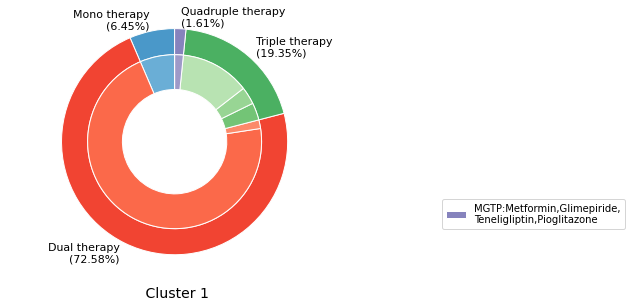

Cluster 167
Monotherapy: 4.79
Dual therapy: 80.24
Triple therapy: 14.37
Quad therapy: 0.6
MG 95.52
MI 4.48
MGP, MGT 41.67 50.0
MGTP 100.0
[4.79, 80.24, 14.37, 0.6]


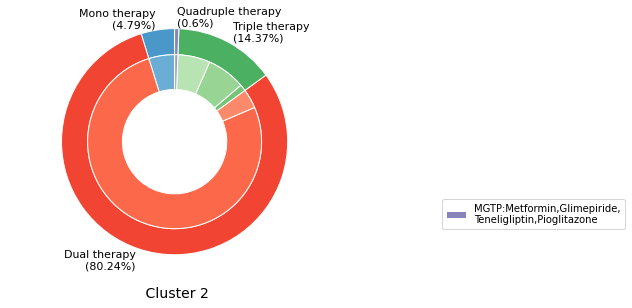

Cluster 107
Monotherapy: 1.87
Dual therapy: 55.14
Triple therapy: 34.58
Quad therapy: 8.41
MG 98.31
MI 1.69
MGP, MGT 32.43 59.46
MGTP 77.78
[1.87, 55.14, 34.58, 8.41]


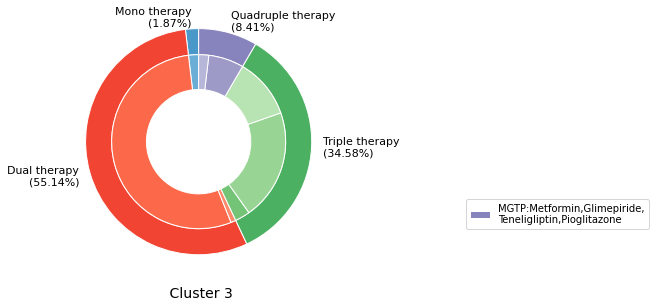

In [77]:
a, b, e, d=[plt.cm.Blues, plt.cm.Reds,plt.cm.Greens,plt.cm.Purples]

C0=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==0]
C1=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==1]
C2=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==2]
cluster_list=[C0,C1,C2]
def count_values(cluster, col_name, value):
    return (cluster[col_name] == value).sum()
therapy_list=[]
    
for c in cluster_list:
    T2DM_antiDM=c[['Metformin','Glimepiride','Teneligliptin','Pioglitazone','Insulin']]
    T2DM_antiDM['therapy_type']=0
    T2DM_antiDM['drug_name']=0
    for i in T2DM_antiDM.index:
        col_val=0
        col_drug=''
        if(T2DM_antiDM['Metformin'][i]!=0):
            col_drug=col_drug+'M'
            col_val=col_val+1
        if(T2DM_antiDM['Glimepiride'][i]!=0):
            col_drug=col_drug+'G'
            col_val=col_val+1
        if(T2DM_antiDM['Teneligliptin'][i]!=0):
            col_drug=col_drug+'T'
            col_val=col_val+1
        if(T2DM_antiDM['Pioglitazone'][i]!=0):
            col_drug=col_drug+'P'
            col_val=col_val+1
        if(T2DM_antiDM['Insulin'][i]!=0):
            col_drug=col_drug+'I'
            col_val=col_val+1
        T2DM_antiDM['therapy_type'][i]=col_val
        T2DM_antiDM['drug_name'][i]=col_drug
    print("Cluster",len(c))
    mono_therapy=round((count_values(T2DM_antiDM,'therapy_type',1)*100)/len(c),2)
    print("Monotherapy:",mono_therapy)
    dual_therapy=round((count_values(T2DM_antiDM,'therapy_type',2)*100)/len(c),2)
    print("Dual therapy:",dual_therapy)
    tri_therapy=round((count_values(T2DM_antiDM,'therapy_type',3)*100)/len(c),2)
    print("Triple therapy:",tri_therapy)
    quad_therapy=round((count_values(T2DM_antiDM,'therapy_type',4)*100)/len(c),2)
    print("Quad therapy:",quad_therapy)
    therapy_list.append(mono_therapy)
    therapy_list.append(dual_therapy)
    therapy_list.append(tri_therapy)
    therapy_list.append(quad_therapy)
#     print(T2DM_antiDM['drug_name'])
    dual_blocks=T2DM_antiDM[T2DM_antiDM['therapy_type']==2]
    MG=dual_blocks[dual_blocks['drug_name']=='MG']
    MG_per=round(len(MG)*100/len(dual_blocks),2)
    print("MG",MG_per)
    MI=dual_blocks[dual_blocks['drug_name']=='MI']
    MI_per=round(len(MI)*100/count_values(T2DM_antiDM,'therapy_type',2),2)
    print("MI",MI_per)
    
    tri_blocks=T2DM_antiDM[T2DM_antiDM['therapy_type']==3]
    MGP=tri_blocks[tri_blocks['drug_name']=='MGP']
    MGT=tri_blocks[tri_blocks['drug_name']=='MGT']
    MGP_per=round(len(MGP)*100/count_values(T2DM_antiDM,'therapy_type',3),2)
    MGT_per=round(len(MGT)*100/count_values(T2DM_antiDM,'therapy_type',3),2)
    print("MGP, MGT",MGP_per,MGT_per)

    quad_blocks=T2DM_antiDM[T2DM_antiDM['therapy_type']==4]
#     print(quad_blocks)
    MGTP=quad_blocks[quad_blocks['drug_name']=='MGTP']
    MGTP_per=round(len(MGTP)*100/len(quad_blocks),2)
    print("MGTP",MGTP_per)
    
    therapy=['Mono therapy\n('+str(therapy_list[0])+'%)','Dual therapy\n('+str(therapy_list[1])+'%)',
             'Triple therapy\n('+str(therapy_list[2])+'%)','Quadruple therapy\n('+str(therapy_list[3])+'%)']
    labels=therapy
    # clusters
    sizes = therapy_list
    print(sizes)
    labels_drugDosage = ['','','','','','','','']
#     labels_drugDosage = ['M','MG','MI','MGP','MGT','oth.','MGTP','']
    div_d=therapy_list[1]/100
    div_t=therapy_list[2]/100
    div_q=therapy_list[3]/100
    sizes_drugDosage = [therapy_list[0], MG_per*div_d,(100-(MG_per))*div_d,
                        (100-(MGP_per+MGT_per))*div_t,MGT_per*div_t,MGP_per*div_t,MGTP_per*div_q,
                        (100-MGTP_per)*div_q]
    
    colors = [a(0.6), b(0.6), e(0.6),d(0.6)]
    colors_drugDosage = [a(0.5),b(0.5),b(0.4),e(0.5),e(0.4),e(0.3),d(0.5),d(0.4)]
    subgroup_names_legs=['MGTP:Metformin,Glimepiride,\nTeneligliptin,Pioglitazone','M:Metformin', 'MG: Metformin, Glimepiride',
                         'MI:Metformin,Insulin', 
    'MGP:Metformin,Glimepiride,Pioglitazone','MGT:Metformin,Glimepiride,Teneligliptin', 'oth: other triple drug combinations']
   
    # First Ring (outside)
    fig, ax = plt.subplots()
    ax.axis('equal')
    mypie, _ = ax.pie(sizes, radius=1.3, labels=labels, colors= colors,startangle=90,textprops={'fontsize': 11})
    plt.setp( mypie, width=0.3, edgecolor='white')

    # Second Ring (Inside)
#     ax.pie(frac, colors=colors ,labels=labels, 
#        autopct='%1.1f%%', textprops={'fontsize': 14})
    
    mypie2, _ = ax.pie(sizes_drugDosage, radius=1.3-0.3, 
    labels=labels_drugDosage, labeldistance=0.78, colors=colors_drugDosage,startangle=90,textprops={'fontsize': 8})
#                        autopct='%1.1f%%', textprops={'fontsize': 14})
    plt.setp( mypie2, width=0.4, edgecolor='white')
    plt.margins(0,0)
    
    plt.legend(loc=(0.9, 0.1))
    handles, labels = ax.get_legend_handles_labels()
#     plt.figure(figsize=(15,10))
    lgd=ax.legend(handles[3:], subgroup_names_legs, loc=(1.3, 0.1))
    therapy_list=[]
    if(c.equals(C0)):
        pie_name="piechartC0"
        plt.xlabel("\n\n Cluster 1",fontsize=14)
    if(c.equals(C1)):
        pie_name="piechartC1"
        plt.xlabel("\n\n Cluster 2",fontsize=14)
    if(c.equals(C2)):
        pie_name="piechartC2"
        plt.xlabel("\n\n Cluster 3",fontsize=14)
    plt.savefig(path+''+pie_name+'.jpeg',dpi=500)
    plt.savefig(path+''+pie_name+'.png',dpi=500)
    plt.savefig(path+''+pie_name+'.tiff',dpi=500)
    export_legend(lgd, "legend_antiDM")
    plt.show()

Cluster 62
Monotherapy: 9.68
Dual therapy: 0.0
Triple therapy: 0.0
Quad therapy: 0.0
CCB 16.67
ACE 0.0
ARB 16.67


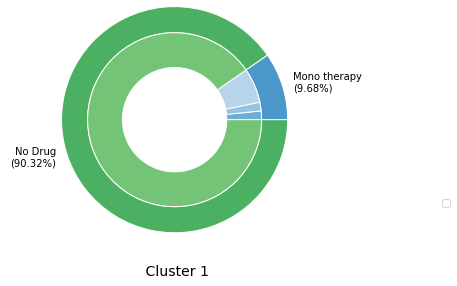

Cluster 167
Monotherapy: 48.5
Dual therapy: 22.16
Triple therapy: 1.2
Quad therapy: 0.0
CCB 22.22
ACE 60.49
ARB 17.28
CAc 54.05
CAr 29.73
CBAr, CAcB 0.0 50.0


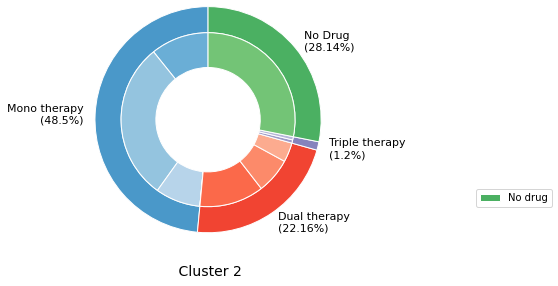

Cluster 107
Monotherapy: 23.36
Dual therapy: 14.95
Triple therapy: 1.87
Quad therapy: 0.0
CCB 28.0
ACE 52.0
ARB 16.0
CAc 50.0
CAr 37.5
CBAr, CAcB 0.0 100.0


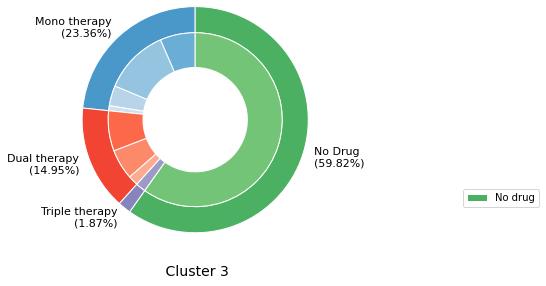

In [78]:
# Create colors
a, b, e, d=[plt.cm.Blues, plt.cm.Reds,plt.cm.Purples, plt.cm.Greens]
for c in cluster_list:
    T2DM_hypDM=c[['Hydrochlorothiazide',
                            'CCB',
                          'ACE Inhibitor',
                            'Beta blockers',
                            'ARB group']]
    T2DM_hypDM['therapy_type']=0
    T2DM_hypDM['drug_name']=0
    for i in T2DM_hypDM.index:
        col_val=0
        col_drug=''
        if(T2DM_hypDM['Hydrochlorothiazide'][i]!=0):
            col_drug=col_drug+'H'
            col_val=col_val+1
        if(T2DM_hypDM['CCB'][i]!=0):
            col_drug=col_drug+'C'
            col_val=col_val+1
        if(T2DM_hypDM['ACE Inhibitor'][i]!=0):
            col_drug=col_drug+'Ac'
            col_val=col_val+1
        if(T2DM_hypDM['Beta blockers'][i]!=0):
            col_drug=col_drug+'B'
            col_val=col_val+1
        if(T2DM_hypDM['ARB group'][i]!=0):
            col_drug=col_drug+'Ar'
            col_val=col_val+1
        T2DM_hypDM['therapy_type'][i]=col_val  
        T2DM_hypDM['drug_name'][i]=col_drug
    print("Cluster",len(c))
    mono_therapy=round((count_values(T2DM_hypDM,'therapy_type',1)*100)/len(c),2)
    print("Monotherapy:",mono_therapy)
    dual_therapy=round((count_values(T2DM_hypDM,'therapy_type',2)*100)/len(c),2)
    print("Dual therapy:",dual_therapy)
    tri_therapy=round((count_values(T2DM_hypDM,'therapy_type',3)*100)/len(c),2)
    print("Triple therapy:",tri_therapy)
    quad_therapy=round((count_values(T2DM_hypDM,'therapy_type',4)*100)/len(c),2)
    print("Quad therapy:",quad_therapy)
    therapy_list.append(mono_therapy)
    therapy_list.append(dual_therapy)
    therapy_list.append(tri_therapy)
    therapy_list.append(quad_therapy)
#     print(T2DM_antiDM['drug_name'])

    mono_blocks=T2DM_hypDM[T2DM_hypDM['therapy_type']==1]
    if(len(mono_blocks)!=0):
        C=mono_blocks[mono_blocks['drug_name']=='C']
        C_per=round(len(C)*100/len(mono_blocks),2)
        print("CCB",C_per)
        Ac=mono_blocks[mono_blocks['drug_name']=='Ac']
        Ac_per=round(len(Ac)*100/len(mono_blocks),2)
        print("ACE",Ac_per)
        Ar=mono_blocks[mono_blocks['drug_name']=='Ar']
        Ar_per=round(len(Ar)*100/len(mono_blocks),2)
        print("ARB",Ar_per)
    
    dual_blocks=T2DM_hypDM[T2DM_hypDM['therapy_type']==2]
    if(len(dual_blocks)!=0):
        CAc=dual_blocks[dual_blocks['drug_name']=='CAc']
        CAc_per=round(len(CAc)*100/len(dual_blocks),2)
        print("CAc",CAc_per)
        CAr=dual_blocks[dual_blocks['drug_name']=='CAr']
        CAr_per=round(len(CAr)*100/len(dual_blocks),2)
        print("CAr",CAr_per)
    
    tri_blocks=T2DM_hypDM[T2DM_hypDM['therapy_type']==3]
    if(len(tri_blocks)!=0):
        CBAr=tri_blocks[tri_blocks['drug_name']=='CBAr']
        CAcB=tri_blocks[tri_blocks['drug_name']=='CAcB']
        CBAr_per=round(len(CBAr)*100/len(tri_blocks),2)
        CAcB_per=round(len(CAcB)*100/len(tri_blocks),2)
        print("CBAr, CAcB",CBAr_per,CAcB_per)

#     if(len(quad_blocks)):
#         quad_blocks=T2DM_hypDM[T2DM_hypDM['therapy_type']==4]
#     #     print(quad_blocks)
#         CBArH=quad_blocks[quad_blocks['drug_name']=='CBArH']
#         CAcBH=quad_blocks[quad_blocks['drug_name']=='CAcBH']
#         CBArH_per=round(len(CBArH)*100/len(quad_blocks),2)
#         CAcBH_per=round(len(CAcBH)*100/len(quad_blocks),2)
#         print("CBArH",CBArH_per)
#         print("CAcBH",CAcBH_per)
    no_drug=100-(therapy_list[0]+therapy_list[1]+therapy_list[2])
    labels=['Mono therapy\n('+str(therapy_list[0])+'%)','Dual therapy\n('+str(therapy_list[1])+'%)',
             'Triple therapy\n('+str(therapy_list[2])+'%)','No Drug\n('+str(no_drug)+'%)']
    sizes = therapy_list
    div_m=therapy_list[0]/100
    div_d=therapy_list[1]/100
    div_t=therapy_list[2]/100
    if(c.equals(C0)):
        no_drug=100-therapy_list[0]
        labels=['Mono therapy\n('+str(therapy_list[0])+'%)','No Drug\n('+str(no_drug)+'%)']
        sizes=[therapy_list[0],100-therapy_list[0]]
#         labels_drugDosage =['CCB','ARB','oth.','']
        labels_drugDosage =['','','','']
        sizes_drugDosage =[C_per*div_m,Ar_per*div_m,(100-(C_per+Ar_per))*div_m,
                           100-therapy_list[0]]
        colors =[a(0.6), d(0.6)]
        colors_drugDosage = [a(0.5),a(0.4),a(0.3),d(0.5)]
        subgroup_names_legs=['CCB only', 'ARB only','No drug','oth.']
        
        # First Ring (outside)
        fig, ax = plt.subplots()
        ax.axis('equal')
        mypie, _ = ax.pie(sizes, radius=1.3, labels=labels, colors= colors,startangle=0)
        plt.setp( mypie, width=0.3, edgecolor='white')

        # Second Ring (Inside)
        mypie2, _ = ax.pie(sizes_drugDosage, radius=1.3-0.3, 
        labels=labels_drugDosage, labeldistance=0.8, colors=colors_drugDosage,startangle=0)
        plt.setp( mypie2, width=0.4, edgecolor='white')
        plt.margins(0,0)
    else:
        no_drug=100-(therapy_list[0]+therapy_list[1]+therapy_list[2])
        sizes=[therapy_list[0],therapy_list[1],therapy_list[2], no_drug]
#         labels_drugDosage =['CCB','ACE','ARB','oth.','CAc','CAr','oth.','CAcB','','']
        labels_drugDosage =['','','','','','','','','','']
        sizes_drugDosage = [C_per*div_m,Ac_per*div_m,Ar_per*div_m,(100-(C_per+Ar_per+Ac_per))*div_m,
                            CAc_per*div_d,CAr_per*div_d, (100-(CAc_per+CAr_per))*div_d,
                            CAcB_per*div_t,(100-CAcB_per)*div_t,
                            100-(therapy_list[0]+therapy_list[1]+therapy_list[2])]
        colors = [a(0.6), b(0.6), e(0.6),d(0.6)]
        colors_drugDosage = [a(0.5),a(0.4),a(0.3),a(0.2),b(0.5),b(0.4),b(0.3),e(0.5),e(0.4),d(0.5)]
        subgroup_names_legs=['No drug','CCB only', 'ACE inhibitor only', 'ARB only', 'oth:other mono drugs',
        'CAc:CCB and ACE inhibitor', 'CAr:CCB and ARB', 'oth:other dual drug comb.', 'CAcB:CCB,ACE inhibitor and Beta blockers',
                             'oth:other triple drug comb.']
   
        # First Ring (outside)
        fig, ax = plt.subplots()
        ax.axis('equal')
        mypie, _ = ax.pie(sizes, radius=1.3, labels=labels, colors= colors,startangle=90,textprops={'fontsize': 11})
        plt.setp( mypie, width=0.3, edgecolor='white')

        # Second Ring (Inside)
        mypie2, _ = ax.pie(sizes_drugDosage, radius=1.3-0.3, 
        labels=labels_drugDosage, labeldistance=0.75, colors=colors_drugDosage,startangle=90,textprops={'fontsize': 9})
        plt.setp( mypie2, width=0.4, edgecolor='white')
        plt.margins(0,0)
    
    plt.legend(loc=(0.9, 0.1))
    handles, labels = ax.get_legend_handles_labels()

    lgd=ax.legend(handles[3:], subgroup_names_legs, loc=(1.3, 0.1))
    therapy_list=[]
    if(c.equals(C0)):
        pie_name="piechartHTNC0"
        plt.xlabel("\n\n Cluster 1",fontsize=14)
    if(c.equals(C1)):
        pie_name="piechartHTNC1"
        plt.xlabel("\n\n Cluster 2",fontsize=14)
    if(c.equals(C2)):
        pie_name="piechartHTNC2"
        plt.xlabel("\n\n Cluster 3",fontsize=14)
    plt.savefig(path+''+pie_name+'.jpeg', dpi=500)
    plt.savefig(path+''+pie_name+'.png', dpi=500)
    plt.savefig(path+''+pie_name+'.tiff', dpi=500)
    export_legend(lgd,"legend_antiHTN")
    plt.show()

    

In [79]:
# Perform ANOVA HbA1c value different or not
# Extract cluster variables to understand differences
C0=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==0]
H0=C0['HbA1c'][C0['HbA1c']!=0]
D0=C0['DispositionIndex'][C0['DispositionIndex']!=0]
A0=C0['Adipsin(ug/ml)'][C0['Adipsin(ug/ml)']!=0]
# B0=C0['bodyfat_PerW']

C1=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==2]
H1=C1['HbA1c'][C1['HbA1c']!=0]
D1=C1['DispositionIndex'][C1['DispositionIndex']!=0]
A1=C1['Adipsin(ug/ml)'][C1['Adipsin(ug/ml)']!=0]
# B1=C1['bodyfat_PerW']

C2=T2DM_dataOrdinal[T2DM_dataOrdinal['cluster_label']==3]
H2=C2['HbA1c'][C2['HbA1c']!=0]
D2=C2['DispositionIndex'][C2['DispositionIndex']!=0]
A2=C2['Adipsin(ug/ml)'][C2['Adipsin(ug/ml)']!=0]
# B2=C2['bodyfat_PerW']
# HbA1c (%)
# FastingGlucose(mg/dl)
# PostPrandialGlucose(mg/dl)
# Fasting Insulin(uIU/ml)
# 30-min Insulin(uIU/ml)
# Indices of β-cell function
# HOMA-B
# Disposition Index
# Indices of Insulin Resistance
# HOMA-IR
# Matsuda Index

print("Length of clusters which has hbA1c values",len(C0),len(C1),len(C2))
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(C0['HbA1c'][C0['HbA1c']!=0],C1['HbA1c'][C1['HbA1c']!=0],C2['HbA1c'][C2['HbA1c']!=0])
print("HbA1c f-value",fvalue,"p-value ", pvalue)

fvalue, pvalue = stats.f_oneway(C0['FastingGlucose(mg/dl)'][C0['HbA1c']!=0],C1['HbA1c'][C1['HbA1c']!=0],C2['HbA1c'][C2['HbA1c']!=0])
print("FastingGlucose(mg/dl) f-value",fvalue,"p-value ", pvalue)

#The p value obtained from ANOVA analysis is significant (p < 0.05), 
#and therefore,there are significant differences among HbA1c value.

KeyError: 'Adipsin(ug/ml)'

In [ ]:
T2DM_data['dbscan'] = labels
df_mean = (T2DM_data.loc[T2DM_data.dbscan!=-1, :]
                    .groupby('dbscan').mean())
# print("Cluster mean data",df_mean)
# To scale and display the top 10 variables with highest variation in whole dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(T2DM_data),columns=T2DM_data.columns)
# print(df_scaled)
df_scaled['dbscan'] = labels
df_scaled_grp = (df_scaled.loc[df_scaled.dbscan!=-1, :]
                    .groupby('dbscan').mean())
# print("Cluster scaled mean data",df_scaled_grp)
# df_mean['Age']
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_scaled_grp.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_scaled_grp[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['dbscan']
tidy = df_scaled[selected_columns].melt(id_vars='dbscan')
sns.barplot(x='dbscan', y='value', hue='variable', data=tidy)